<a href="https://www.kaggle.com/code/gabrielever/integrador-one?scriptVersionId=111662541" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Projeto Integrador I**
 **Ciências de Dados | Fatec Baixada Santista**
 * Estudo acerca da influência do contexto social no desempenho do Enem
 * **Atualização:** Atualmente em estágio de Organização de Código | 20% completo
 * Tableau: https://public.tableau.com/app/profile/gabriel.luiz5875

In [1]:
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly.express as px
import seaborn as sns
from tqdm import tqdm
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot') # ggplot (Cinza)| dark_background (Dark)

In [ ]:
# Dados brutos | Não utilize, pos precisará passar por tratamento
df = pd.read_csv('../input/ds-integrador-one/MICRODADOS_ENEM_2021.csv', sep=';', encoding='latin-1')

### **Dados já tratados para a Análise**
* Não é necessário realizar nenhuma acão, somente  nas variaveis

In [2]:
# Dados limpos e já tratados (df: contidas as colunas originais | ds: colunas uteis para a análise)
df = pd.read_csv('../input/treated-data/DadosTratados.csv', sep=';', encoding='latin-1')
ds = pd.read_csv('../input/treated-data/DadosSelecionados.csv', sep=';', encoding='latin-1')

## **Tratamento, Limpesa e Manipulação de Dados**
> Atenção: Esse foi o algoritmo criado e utilizado por mim, aplicados somente nos dados brutos
* Ajustar, selecionar os critérios para nossos dados
* Organizar as siglas e alternativas para torná-las identificaveis para a análise
* Criação de duas novas colunas para a classe e pontuação (5h a 10h de execução)



Criação da amostra conforme os critérios estabelecidos na pequisa

In [ ]:
# Tamanha antes
print(f'Antes: {df.shape[0]}')

# Selecionar jovens entre 17 a 29 (pode incluir 30, pois são dados continuos "Entre 26 e 30 anos")
df = df.loc[ (df['TP_FAIXA_ETARIA'] <= 10) & (df['TP_FAIXA_ETARIA'] != 1) & (df['TP_NACIONALIDADE'] == 1), : ]

# Remover linha caso todos os dados do questionário sejam Nulos (Testado em caso tenha algum, resulta em mesmo resultado)
df = df.dropna( axis=0, how='all', subset=['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']).reset_index(drop=True)

# Tamanho depois
print(f'Depois: {df.shape[0]}')

Manipulação para tornar mais facil a leitura

In [ ]:
# Faixa Etária
df['TP_FAIXA_ETARIA'] = df['TP_FAIXA_ETARIA'].apply( lambda x : 'Menor 17' if x == 1 else
                                                                '17 anos' if x == 2 else
                                                                '18 anos' if x == 3 else
                                                                '19 anos' if x == 4 else
                                                                '20 anos' if x == 5 else
                                                                '21 anos' if x == 6 else
                                                                '22 anos' if x == 7 else
                                                                '23 anos' if x == 8 else
                                                                '24 anos' if x == 9 else
                                                                '25 anos' if x == 10 else
                                                                '26 e 30 anos' if x == 11 else
                                                                '31 e 35 anos' if x == 12 else
                                                                '36 e 40 anos' if x == 13 else
                                                                '41 e 45 anos' if x == 14 else
                                                                '46 e 50 anos' if x == 15 else
                                                                '51 e 55 anos' if x == 16 else
                                                                '56 e 60 anos' if x == 17 else
                                                                '61 e 65 anos' if x == 18 else
                                                                '66 e 70 anos' if x == 19 else
                                                                'Maior de 70' if x == 20 else np.nan )

# Situação Civil
df['TP_ESTADO_CIVIL'] = df['TP_ESTADO_CIVIL'].apply( lambda x : 'Não informado' if x == 0 else
                                                                'Solteiro(a)' if x == 1 else
                                                                'Casado(a)/Mora com companheiro(a)' if x == 2 else
                                                                'Casado(a)/Mora com companheiro(a)' if x == 3 else
                                                                'Viúvo(a)' if x == 4 else np.nan )

# Racial
df['TP_COR_RACA'] = df['TP_COR_RACA'].apply( lambda x : 'Não declarado' if x == 0 else
                                                        'Branca' if x == 1 else
                                                        'Preta' if x == 2 else
                                                        'Parda' if x == 3 else
                                                        'Amarela' if x == 4 else
                                                        'Indígena' if x == 5 else
                                                        'Não dispõe da informação' if x == 6 else np.nan )

# Nacionalidade
df['TP_NACIONALIDADE'] = df['TP_NACIONALIDADE'].apply( lambda x : 'Não informado' if x == 0 else
                                                                  'Brasileiro(a)' if x == 1 else
                                                                  'Brasileiro(a) Naturalizado(a)' if x == 2 else
                                                                  'Estrangeiro(a)' if x == 3 else
                                                                  'Brasileiro(a) Nato(a), nascido(a) no exterior' if x == 4 else np.nan )

# Situação de conclusão do Ensino Médio
df['TP_ST_CONCLUSAO'] = df['TP_ST_CONCLUSAO'].apply( lambda x : 'Já concluí o Ensino Médio' if x == 1 else
                                                                'Estou cursando e concluirei o Ensino Médio em 2021' if x == 2 else
                                                                'Estou cursando e concluirei o Ensino Médio após 2021' if x == 3 else
                                                                'Não concluí e não estou cursando o Ensino Médio' if x == 4 else
                                                                'Brasileiro(a) Nato(a), nascido(a) no exterior' if x == 4 else np.nan )

# Ano de Conclusão do Ensino Médio
df['TP_ANO_CONCLUIU'] = df['TP_ANO_CONCLUIU'].apply( lambda x : 'Não informado' if x == 0 else
                                                                '2020' if x == 1 else
                                                                '2019' if x == 2 else
                                                                '2018' if x == 3 else
                                                                '2017' if x == 4 else
                                                                '2016' if x == 5 else
                                                                '2015' if x == 6 else                                  
                                                                '2014' if x == 7 else
                                                                '2013' if x == 8 else
                                                                '2012' if x == 9 else                                                         
                                                                '2011' if x == 10 else
                                                                '2010' if x == 11 else
                                                                '2009' if x == 12 else                                                                
                                                                '2008' if x == 13 else
                                                                '2007' if x == 14 else
                                                                'Antes de 2007' if x == 15 else np.nan )

# Tipo de escola do Ensino Médio
df['TP_ESCOLA'] = df['TP_ESCOLA'].apply( lambda x : 'Não Respondeu' if x == 1 else
                                                    'Pública' if x == 2 else
                                                    'Privada' if x == 3 else np.nan )

# Tipo de instituição que concluiu ou concluirá o Ensino Médio
df['TP_ENSINO'] = df['TP_ENSINO'].apply( lambda x : 'Ensino Regular' if x == 1 else
                                                    'Educação Especial - Modalidade Substitutiva' if x == 2 else np.nan )

# Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos3
df['IN_TREINEIRO'] = df['IN_TREINEIRO'].apply( lambda x : 'Sim' if x == 1 else
                                                          'Não' if x == 0 else np.nan )

# Dependência administrativa (Escola)
df['TP_DEPENDENCIA_ADM_ESC'] = df['TP_DEPENDENCIA_ADM_ESC'].apply( lambda x : 'Federal' if x == 1 else
                                                                              'Estadual' if x == 2 else
                                                                              'Municipal' if x == 3 else
                                                                              'Privada' if x == 4 else np.nan )

# Localização (Escola)
df['TP_LOCALIZACAO_ESC'] = df['TP_LOCALIZACAO_ESC'].apply( lambda x : 'Urbana' if x == 1 else
                                                                      'Rural' if x == 2 else np.nan )

# Situação de funcionamento (Escola)
df['TP_SIT_FUNC_ESC'] = df['TP_SIT_FUNC_ESC'].apply( lambda x : 'Em atividade' if x == 1 else
                                                                'Paralisada' if x == 2 else
                                                                'Extinta' if x == 3 else
                                                                'Escola extinta em anos anteriores' if x == 4 else np.nan )

# Presença na prova objetiva de Ciências da Natureza
df['TP_PRESENCA_CN'] = df['TP_PRESENCA_CN'].apply( lambda x : 'Faltou à prova' if x == 0 else
                                                              'Presente na prova' if x == 1 else
                                                              'Eliminado na prova' if x == 2 else np.nan )

# Presença na prova objetiva de Ciências Humanas
df['TP_PRESENCA_CH'] = df['TP_PRESENCA_CH'].apply( lambda x : 'Faltou à prova' if x == 0 else
                                                              'Presente na prova' if x == 1 else
                                                              'Eliminado na prova' if x == 2 else np.nan )

# Presença na prova objetiva de Linguagens e Códigos
df['TP_PRESENCA_LC'] = df['TP_PRESENCA_LC'].apply( lambda x : 'Faltou à prova' if x == 0 else
                                                              'Presente na prova' if x == 1 else
                                                              'Eliminado na prova' if x == 2 else np.nan )

# Presença na prova objetiva de Matemática
df['TP_PRESENCA_MT'] = df['TP_PRESENCA_MT'].apply( lambda x : 'Faltou à prova' if x == 0 else
                                                              'Presente na prova' if x == 1 else
                                                              'Eliminado na prova' if x == 2 else np.nan )

# Código do tipo de prova de Ciências da Natureza
df['CO_PROVA_CN'] = df['CO_PROVA_CN'].apply( lambda x : 'Azul' if x == 909 else
                                                        'Amarela' if x == 910 else
                                                        'Cinza' if x == 911 else
                                                        'Rosa' if x == 912 else
                                                        'Laranja - Braille' if x == 915 else
                                                        'Laranja - Adaptada Ledor' if x == 916 else
                                                        'Verde - Videoprova - Libras' if x == 917 else
                                                        'Azul (Reaplicação)' if x == 989 else
                                                        'Amarela (Reaplicação)' if x == 990 else
                                                        'Cinza (Reaplicação)' if x == 991 else
                                                        'Rosa (Reaplicação)' if x == 992 else
                                                        'Laranja - Adaptada Ledor (Reaplicação)' if x == 996 else
                                                        'Azul (Digital)' if x == 1011 else
                                                        'Amarela (Digital)' if x == 1012 else
                                                        'Rosa (Digital)' if x == 1013 else
                                                        'Cinza (Digital)' if x == 1014 else
                                                        'Azul (Segunda oportunidade)' if x == 1045 else
                                                        'Amarela (Segunda oportunidade)' if x == 1046 else
                                                        'Cinza (Segunda oportunidade)' if x == 1047 else
                                                        'Rosa (Segunda oportunidade)' if x == 1048 else
                                                        'Laranja - Adaptada Ledor (Segunda oportunidade)' if x == 1052 else np.nan )

# Código do tipo de prova de Ciências Humanas
df['CO_PROVA_CH'] = df['CO_PROVA_CH'].apply( lambda x : 'Azul' if x == 879 else
                                                        'Amarela' if x == 880 else
                                                        'Cinza' if x == 881 else
                                                        'Rosa' if x == 882 else
                                                        'Laranja - Braille' if x == 885 else
                                                        'Laranja - Adaptada Ledor' if x == 886 else
                                                        'Verde - Videoprova - Libras' if x == 887 else
                                                        'Azul (Reaplicação)' if x == 959 else
                                                        'Amarela (Reaplicação)' if x == 960 else
                                                        'Cinza (Reaplicação)' if x == 961 else
                                                        'Rosa (Reaplicação)' if x == 962 else
                                                        'Laranja - Adaptada Ledor (Reaplicação)' if x == 966 else
                                                        'Azul (Digital)' if x == 999 else
                                                        'Amarela (Digital)' if x == 1000 else
                                                        'Rosa (Digital)' if x == 1001 else
                                                        'Cinza (Digital)' if x == 1002 else
                                                        'Azul (Segunda oportunidade)' if x == 1015 else
                                                        'Amarela (Segunda oportunidade)' if x == 1016 else
                                                        'Cinza (Segunda oportunidade)' if x == 1017 else
                                                        'Rosa (Segunda oportunidade)' if x == 1018 else
                                                        'Laranja - Adaptada Ledor (Segunda oportunidade)' if x == 1022 else np.nan )

# Código do tipo de prova de Linguagens e Códigos
df['CO_PROVA_LC'] = df['CO_PROVA_LC'].apply( lambda x : 'Azul' if x == 889 else
                                                        'Amarela' if x == 890 else
                                                        'Cinza' if x == 891 else
                                                        'Rosa' if x == 892 else
                                                        'Laranja - Braille' if x == 895 else
                                                        'Laranja - Adaptada Ledor' if x == 896 else
                                                        'Verde - Videoprova - Libras' if x == 897 else
                                                        'Azul (Reaplicação)' if x == 969 else
                                                        'Amarela (Reaplicação)' if x == 970 else
                                                        'Cinza (Reaplicação)' if x == 971 else
                                                        'Rosa (Reaplicação)' if x == 972 else
                                                        'Laranja - Adaptada Ledor (Reaplicação)' if x == 976 else
                                                        'Azul (Digital)' if x == 1003 else
                                                        'Amarela (Digital)' if x == 1004 else
                                                        'Rosa (Digital)' if x == 1005 else
                                                        'Cinza (Digital)' if x == 1006 else
                                                        'Azul (Segunda oportunidade)' if x == 1025 else
                                                        'Amarela (Segunda oportunidade)' if x == 1026 else
                                                        'Cinza (Segunda oportunidade)' if x == 1027 else
                                                        'Rosa (Segunda oportunidade)' if x == 1028 else
                                                        'Laranja - Adaptada Ledor (Segunda oportunidade)' if x == 1032 else np.nan )

# Código do tipo de prova de Matemática
df['CO_PROVA_MT'] = df['CO_PROVA_MT'].apply( lambda x : 'Azul' if x == 899 else
                                                        'Amarela' if x == 900 else
                                                        'Cinza' if x == 901 else
                                                        'Rosa' if x == 902 else
                                                        'Laranja - Braille' if x == 905 else
                                                        'Laranja - Adaptada Ledor' if x == 906 else
                                                        'Verde - Videoprova - Libras' if x == 907 else
                                                        'Azul (Reaplicação)' if x == 979 else
                                                        'Amarela (Reaplicação)' if x == 980 else
                                                        'Cinza (Reaplicação)' if x == 981 else
                                                        'Rosa (Reaplicação)' if x == 982 else
                                                        'Laranja - Adaptada Ledor (Reaplicação)' if x == 986 else
                                                        'Azul (Digital)' if x == 1007 else
                                                        'Amarela (Digital)' if x == 1008 else
                                                        'Rosa (Digital)' if x == 1009 else
                                                        'Cinza (Digital)' if x == 1010 else
                                                        'Azul (Segunda oportunidade)' if x == 1035 else
                                                        'Amarela (Segunda oportunidade)' if x == 1036 else
                                                        'Cinza (Segunda oportunidade)' if x == 1037 else
                                                        'Rosa (Segunda oportunidade)' if x == 1038 else
                                                        'Laranja - Adaptada Ledor (Segunda oportunidade)' if x == 1042 else np.nan )

# Língua Estrangeira 
df['TP_LINGUA'] = df['TP_LINGUA'].apply( lambda x : 'Inglês' if x == 0 else 'Espanhol' if x == 1 else np.nan )

# Situação da redação do participante
df['TP_STATUS_REDACAO'] = df['TP_STATUS_REDACAO'].apply( lambda x : 'Sem problemas' if x == 1 else
                                                                    'Anulada' if x == 2 else
                                                                    'Cópia Texto Motivador' if x == 3 else 
                                                                    'Em Branco' if x == 4 else
                                                                    'Fuga ao tema' if x == 6 else
                                                                    'Não atendimento ao tipo textual' if x == 7 else 
                                                                    'Texto insuficiente' if x == 8 else
                                                                    'Parte desconectada' if x == 9 else np.nan )

# Até que série seu pai, ou o homem responsável por você, estudou?
df['Q001'] = df['Q001'].apply( lambda x : 'Nunca estudou' if x == 'A' else
                                          'Não completou a 4ª série/5º ano do Ensino Fundamental' if x == 'B' else
                                          'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental' if x == 'C' else
                                          'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio' if x == 'D' else
                                          'Completou o Ensino Médio, mas não completou a Faculdade' if x == 'E' else
                                          'Completou a Faculdade, mas não completou a Pós-graduação' if x == 'F' else                                  
                                          'Completou a Pós-graduação' if x == 'G' else
                                          'Não sei' if x == 'H' else np.nan )

# Até que série sua mãe, ou a mulher responsável por você, estudou?
df['Q002'] = df['Q002'].apply( lambda x : 'Nunca estudou' if x == 'A' else
                                          'Não completou a 4ª série/5º ano do Ensino Fundamental' if x == 'B' else
                                          'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental' if x == 'C' else
                                          'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio' if x == 'D' else
                                          'Completou o Ensino Médio, mas não completou a Faculdade' if x == 'E' else
                                          'Completou a Faculdade, mas não completou a Pós-graduação' if x == 'F' else                                  
                                          'Completou a Pós-graduação' if x == 'G' else
                                          'Não sei' if x == 'H' else np.nan )

# A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que
# contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você.
# (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).
""" Original
df['Q003'] = df['Q003'].apply( lambda x : 'Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista' if x == 'A' else
                                          'Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria' if x == 'B' else
                                          'Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista' if x == 'C' else
                                          'Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria' if x == 'D' else
                                          'Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados' if x == 'E' else
                                          'Não sei' if x == 'F' else np.nan )

# A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que
# contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você.
# (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).
df['Q004'] = df['Q004'].apply( lambda x : 'Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista' if x == 'A' else
                                          'Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria' if x == 'B' else
                                          'Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista' if x == 'C' else
                                          'Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria' if x == 'D' else
                                          'Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados' if x == 'E' else
                                          'Não sei' if x == 'F' else np.nan )
"""


df['Q003'] = df['Q003'].apply( lambda x : 'Grupo 1' if x == 'A' else
                                          'Grupo 2' if x == 'B' else
                                          'Grupo 3' if x == 'C' else
                                          'Grupo 4' if x == 'D' else
                                          'Grupo 5' if x == 'E' else
                                          'Não sei' if x == 'F' else np.nan )

# A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que
# contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você.
# (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).
df['Q004'] = df['Q004'].apply( lambda x : 'Grupo 1' if x == 'A' else
                                          'Grupo 2' if x == 'B' else
                                          'Grupo 3' if x == 'C' else
                                          'Grupo 4' if x == 'D' else
                                          'Grupo 5' if x == 'E' else
                                          'Não sei' if x == 'F' else np.nan )

# Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
""" Original
df['Q006'] = df['Q006'].apply( lambda x : 'Nenhuma Renda' if x == 'A' else
                                          'Até RS 1.100,00' if x == 'B' else
                                          'De RS 1.100,01 até RS 1.650,00' if x == 'C' else
                                          'De RS 1.650,01 até RS 2.200,00' if x == 'D' else
                                          'De RS 2.200,01 até RS 2.750,00' if x == 'E' else
                                          'De RS 2.750,01 até RS 3.300,00' if x == 'F' else
                                          'De RS 3.300,01 até RS 4.400,00' if x == 'G' else
                                          'De RS 4.400,01 até RS 5.500,00' if x == 'H' else
                                          'De RS 5.500,01 até RS 6.600,00' if x == 'I' else
                                          'De RS 6.600,01 até RS 7.700,00' if x == 'J' else
                                          'De RS 7.700,01 até RS 8.800,00' if x == 'K' else
                                          'De RS 8.800,01 até RS 9.900,00' if x == 'L' else
                                          'De RS 9.900,01 até RS 11.000,00' if x == 'M' else
                                          'De RS 11.000,01 até RS 13.200,00' if x == 'N' else
                                          'De RS 13.200,01 até RS 16.500,00' if x == 'O' else
                                          'De RS 16.500,01 até RS 22.000,00' if x == 'P' else
                                          'Acima de R$ 22.000,00' if x == 'Q' else np.nan )
"""
# Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)
df['Q006'] = df['Q006'].apply( lambda x : 0 if x == 'A' else
                                          1100.0 if x == 'B' else
                                          1650.0 if x == 'C' else
                                          2200.0 if x == 'D' else
                                          2750.0 if x == 'E' else
                                          3300.0 if x == 'F' else
                                          4400.0 if x == 'G' else
                                          5500.0 if x == 'H' else
                                          6600.0 if x == 'I' else
                                          7700.0 if x == 'J' else
                                          8800.0 if x == 'K' else
                                          9900.0 if x == 'L' else
                                          11000.0 if x == 'M' else
                                          13200.0 if x == 'N' else
                                          16500.0 if x == 'O' else
                                          22000.0 if x == 'P' else
                                          22999.9 if x == 'Q' else np.nan )
                              
                              
# Em sua residência trabalha empregado(a) doméstico(a)?
df['Q007'] = df['Q007'].apply( lambda x : 'Não' if x == 'A' else
                                          '1 ou 2 dias por semana' if x == 'B' else
                                          '3 ou 4 dias por semana' if x == 'C' else
                                          'Pelo menos 5 por semana' if x == 'D' else np.nan )

# Na sua residência tem banheiro?
df['Q008'] = df['Q008'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem quartos para dormir?
df['Q009'] = df['Q009'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem carro?
df['Q010'] = df['Q010'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem motocicleta?
df['Q011'] = df['Q011'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem geladeira?
df['Q012'] = df['Q012'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem freezer (independente ou segunda porta da geladeira)?
df['Q013'] = df['Q013'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)
df['Q014'] = df['Q014'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?
df['Q015'] = df['Q015'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem forno micro-ondas?
df['Q016'] = df['Q016'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem máquina de lavar louça?
df['Q017'] = df['Q017'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem aspirador de pó
df['Q018'] = df['Q018'].apply( lambda x : False if x == 'A' else
                                          True if x == 'B' else np.nan )

# Na sua residência tem televisão em cores?
df['Q019'] = df['Q019'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem aparelho de DVD?
df['Q020'] = df['Q020'].apply( lambda x : False if x == 'A' else
                                          True if x == 'B' else np.nan )

# Na sua residência tem TV por assinatura?
df['Q021'] = df['Q021'].apply( lambda x : False if x == 'A' else
                                          True if x == 'B' else np.nan )

# Na sua residência tem telefone celular?
df['Q022'] = df['Q022'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem telefone fixo?
df['Q023'] = df['Q023'].apply( lambda x : False if x == 'A' else
                                          True if x == 'B' else np.nan )

# Na sua residência tem computador?
df['Q024'] = df['Q024'].apply( lambda x : 0 if x == 'A' else
                                          1 if x == 'B' else
                                          2 if x == 'C' else
                                          3 if x == 'D' else
                                          4 if x == 'E' else np.nan )

# Na sua residência tem acesso à Internet?
df['Q025'] = df['Q025'].apply( lambda x : False if x == 'A' else
                                          True if x == 'B' else np.nan )

print('Completo')

Criação da coluna CLASSE e PONTOS | Classe Socioeconomica e sua Pontuação **(5Hr de Execução)**

In [ ]:
for i in tqdm(range(len(df))):
    # Considerados quetodos possuemagua encanada, mas não rua asfaltada
    pont = 4
# Banheiros
    if df.loc[i, 'Q008'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q008'] == 1:
        pont += 3
        
    elif df.loc[i, 'Q008'] == 2:
        pont += 7
        
    elif df.loc[i, 'Q008'] == 3:
        pont += 10
        
    elif df.loc[i, 'Q008'] == 4:
        pont += 14

# Em sua residência trabalha empregado(a) doméstico(a)?
    if df.loc[i, 'Q007'] == 0:
        pont += 0
    elif df.loc[i, 'Q007'] == 1:
        pont += 3
    
    elif df.loc[i, 'Q007'] == 2:
        pont += 7
    
    elif df.loc[i, 'Q007'] == 3:
        pont += 10
    
    elif df.loc[i, 'Q007'] == 4:
        pont += 14
        
# Automóveis  
    if df.loc[i, 'Q010'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q010'] == 1:
        pont += 3
    
    elif df.loc[i, 'Q010'] == 2:
        pont += 5
    
    elif df.loc[i, 'Q010'] == 3:
        pont += 8
    
    elif df.loc[i, 'Q010'] == 4:
        pont += 11
    
# Computador  
    if df.loc[i, 'Q024'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q024'] == 1:
        pont += 3
    
    elif df.loc[i, 'Q024'] == 2:
        pont += 6
    
    elif df.loc[i, 'Q024'] == 3:
        pont += 8
    
    elif df.loc[i, 'Q024'] == 4:
        pont += 11
    
    
# Lava Louças  
    if df.loc[i, 'Q017'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q017'] == 1:
        pont += 3
    
    elif df.loc[i, 'Q017'] == 2:
        pont += 6
    
    elif df.loc[i, 'Q017'] == 3:
        pont += 6
    
    elif df.loc[i, 'Q017'] == 4:
        pont += 6
        
# Geladeira
    if df.loc[i, 'Q012'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q012'] == 1:
        pont += 2
    
    elif df.loc[i, 'Q012'] == 2:
        pont += 3
    
    elif df.loc[i, 'Q012'] == 3:
        pont += 5
    
    elif df.loc[i, 'Q012'] == 4:
        pont += 5
    
# Frezzer
    if df.loc[i, 'Q013'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q013'] == 1:
        pont += 2
    
    elif df.loc[i, 'Q013'] == 2:
        pont += 4
    
    elif df.loc[i, 'Q013'] == 3:
        pont += 6
    
    elif df.loc[i, 'Q013'] == 4:
        pont += 6
    
# Maquina de Lavar
    if df.loc[i, 'Q014'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q014'] == 1:
        pont += 2
    
    elif df.loc[i, 'Q014'] == 2:
        pont += 4
    
    elif df.loc[i, 'Q014'] == 3:
        pont += 6
    
    elif df.loc[i, 'Q014'] == 4:
        pont += 6
    
# DVD
    if df.loc[i, 'Q020'] == False:
        pont += 0
        
    elif df.loc[i, 'Q020'] == True:
        pont += 1
    
# Micro-Ondas
    if df.loc[i, 'Q016'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q016'] == 1:
        pont += 2
    
    elif df.loc[i, 'Q016'] == 2:
        pont += 4
    
    elif df.loc[i, 'Q016'] == 3:
        pont += 4
    
    elif df.loc[i, 'Q016'] == 4:
        pont += 4
    
# Motocicleta
    if df.loc[i, 'Q011'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q011'] == 1:
        pont += 1
    
    elif df.loc[i, 'Q011'] == 2:
        pont += 3
    
    elif df.loc[i, 'Q011'] == 3:
        pont += 3
    
    elif df.loc[i, 'Q011'] == 4:
        pont += 3
        
 # Secadora de Roupas
    if df.loc[i, 'Q015'] == 0:
        pont += 0
        
    elif df.loc[i, 'Q015'] == 1:
        pont += 1
    
    elif df.loc[i, 'Q015'] == 2:
        pont += 3
    
    elif df.loc[i, 'Q015'] == 3:
        pont += 3
    
    elif df.loc[i, 'Q015'] == 4:
        pont += 3
        
# Grau do Chefe de Família

    # Se caso o chefe for a mãe
    if df.loc[i, 'Q001'] == 'Não sei':      
        if df.loc[i, 'Q002'] == 'Não sei':
            pont += 0
            
        elif df.loc[i, 'Q002'] == 'Nunca estudou' or df.loc[i, 'Q002'] == 'Não completou a 4ª série/5º ano do Ensino Fundamental':
            pont += 0
            
        elif df.loc[i, 'Q002'] == 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental':
            pont += 1

        elif df.loc[i, 'Q002'] == 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio':
            pont += 2

        elif df.loc[i, 'Q002'] == 'Completou o Ensino Médio, mas não completou a Faculdade':
            pont += 4

        elif df.loc[i, 'Q002'] == 'Completou a Faculdade, mas não completou a Pós-graduação' or df.loc[i, 'Q001'] == 'Completou a Pós-graduação':
            pont += 7
    
    elif df.loc[i, 'Q001'] == 'Nunca estudou' or df.loc[i, 'Q001'] == 'Não completou a 4ª série/5º ano do Ensino Fundamental':
         pont += 0
            
    elif df.loc[i, 'Q001'] == 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental':
        pont += 1
        
    elif df.loc[i, 'Q001'] == 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio':
        pont += 2
        
    elif df.loc[i, 'Q001'] == 'Completou o Ensino Médio, mas não completou a Faculdade':
        pont += 4
        
    elif df.loc[i, 'Q001'] == 'Completou a Faculdade, mas não completou a Pós-graduação' or df.loc[i, 'Q001'] == 'Completou a Pós-graduação':
        pont += 7

# Criação da coluna pontos de a cordo com usa pontuação pelo questionário socioeconomico
    df.loc[ i , 'PONTOS'] = pont

# Criação da coluna com sua classe social
df['CLASSE'] = df['PONTOS'].apply( lambda x : 'DE' if x >=  0 and x <= 16 else
                                              'C2' if x >= 17 and x <= 22 else
                                              'C1' if x >= 23 and x <= 28 else
                                              'B2' if x >= 29 and x <= 37 else
                                              'B1' if x >= 38 and x <= 44 else
                                              'A' if x >= 45 and x <= 100 else np.nan)

**Beta** | Criação de uma nova coluna com as Coordenadas do local da prova (Não utilizado na pesquisa, + de 1 dia de execução)

In [ ]:
locator = Nominatim(user_agent='myGeocoder')
for i in tqdm(range(len(df))):
    location = locator.geocode(f"{df.loc[i, 'NOME_MUNICIPIO_PV']}, {df.loc[i, 'SIGLA_UF_PV']}")

    if type(location) != type(None):
        if 'lat' in location.raw and 'lon' in location.raw:
            df.loc[i, 'LAT'] = location.raw['lat']
            df.loc[i, 'LON'] = location.raw['lon']
        else:
            df.loc[i, 'LAT'] = np.nan
            df.loc[i, 'LON'] = np.nan
    else:
        df.loc[i, 'LAT'] = np.nan
        df.loc[i, 'LON'] = np.nan

# Exportação do conjunto de dados contendo todas as colunas, somente renomeadas
print('• Exportação Iniciada')
df.to_csv('DadosTratados.csv', sep=';', encoding='latin-1')

# Seleção de colunas uteis para a análise
ds = df[['INSCRITO', 'PONTOS', 'CLASSE', 'FAIXA_ETARIA', 'GENERO', 'ESTADO_CIVIL', 'COR_RACA', 'SIT_CONCLUCAO_EM', 'ANO_CONCLUIU_EM',
         'TIPO_ESC', 'TIPO_ENSINO', 'NOME_MUNICIPIO_ESC', 'UF_ESC', 'LAT', 'LON', 'DEPENDENCIA_ADM_ESC', 'LOCALIZACAO_ESC', 'SIT_FUNC_ESC',
         'NOME_MUNICIPIO_PV', 'SIGLA_UF_PV', 'NOTA_REDAC', 'STATUS_REDACAO', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA',
         'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'GRUPO_PAI_RPSV', 'GRUPO_MAE_RPSV', 'QUANT_MORAM','RENDA_FAMIL',
         'EMPR_DOMESTICA', 'BANHEIRO', 'QUARTOS', 'CARRO', 'MOTO', 'GELADEIRA', 'FREZZER', 'LAVADORA', 'SECADORA', 'MICROONDAS',
         'LAVA_PRATOS', 'ASPIRADOR', 'TV', 'DVD', 'ASSIN_TV', 'CELULAR', 'TEL_FIXO', 'COMPUTADOR', 'INTERNET']]

# Exportação do conjunto de dados contendo as colunas uteis para a análise
ds.to_csv('DadosSelecionados.csv', sep=';', encoding='latin-1')
print('• Completo')

Renomeação dos nomes da coluna e exportação dos dados

In [ ]:
# Nomeação de colunas para facilitar na identificação
df.columns = ['INSCRITO', 'ANO', 'FAIXA_ETARIA', 'GENERO', 'ESTADO_CIVIL', 'COR_RACA', 'NACIONALIDADE', 'SIT_CONCLUCAO_EM',
              'ANO_CONCLUIU_EM', 'TIPO_ESC', 'TIPO_ENSINO', 'TREINEIRO', 'CD_MUNICIPIO_ESC', 'NOME_MUNICIPIO_ESC', 'CD_UF_ESC',
              'UF_ESC', 'DEPENDENCIA_ADM_ESC', 'LOCALIZACAO_ESC', 'SIT_FUNC_ESC', 'CD_MUNICIPIO_PV', 'NOME_MUNICIPIO_PV', 'CD_UF_PV',
              'SIGLA_UF_PV', 'PRESENCA_NATUREZA', 'PRESENCA_HUMANAS', 'PRESENCA_LINGUAGENS', 'PRESENCA_MATEMATICA', 'TIPO_NATUREZA',
              'TIPO_HUMANAS', 'TIPO_LINGUAGENS', 'TIPO_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_HUMANAS', 'NOTA_LINGUAGENS',
              'NOTA_MATEMATICA', 'RESP_NATUREZA', 'RESP_HUMANAS', 'RESP_LINGUAGENS', 'RESP_MATEMATICA', 'TIPO_LING',
              'GABARITO_NATUREZA', 'GABARITO_HUMANAS', 'GABARITO_LINGUAGENS', 'GABARITO_MATEMATICA', 'STATUS_REDACAO', 'NOTA_COMP1',
              'NOTA_COMP2', 'NOTA_COMP3', 'NOTA_COMP4', 'NOTA_COMP5', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV',
              'GRUPO_PAI_RPSV', 'GRUPO_MAE_RPSV', 'QUANT_MORAM', 'RENDA_FAMIL', 'EMPR_DOMESTICA', 'BANHEIRO', 'QUARTOS', 'CARRO',
              'MOTO', 'GELADEIRA', 'FREZZER', 'LAVADORA', 'SECADORA', 'MICROONDAS', 'LAVA_PRATOS', 'ASPIRADOR', 'TV', 'DVD',
              'ASSIN_TV', 'CELULAR', 'TEL_FIXO', 'COMPUTADOR', 'INTERNET', 'PONTOS', 'CLASSE']

# Exportação do conjunto de dados contendo todas as colunas, somente renomeadas
df.to_csv('DadosTratados.csv', sep=';', encoding='latin-1')

# Seleção de colunas uteis para a análise
ds = df[['INSCRITO', 'PONTOS', 'CLASSE', 'FAIXA_ETARIA', 'GENERO', 'ESTADO_CIVIL', 'COR_RACA', 'SIT_CONCLUCAO_EM', 'ANO_CONCLUIU_EM',
         'TIPO_ESC', 'TIPO_ENSINO', 'NOME_MUNICIPIO_ESC', 'UF_ESC', 'DEPENDENCIA_ADM_ESC', 'LOCALIZACAO_ESC',
         'SIT_FUNC_ESC', 'NOME_MUNICIPIO_PV', 'SIGLA_UF_PV', 'NOTA_REDAC', 'STATUS_REDACAO', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS',
         'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'GRUPO_PAI_RPSV', 'GRUPO_MAE_RPSV', 'QUANT_MORAM',
         'RENDA_FAMIL', 'EMPR_DOMESTICA', 'BANHEIRO', 'QUARTOS', 'CARRO', 'MOTO', 'GELADEIRA', 'FREZZER','LAVADORA','SECADORA' 
         'MICROONDAS', 'LAVA_PRATOS', 'ASPIRADOR', 'TV', 'DVD', 'ASSIN_TV', 'CELULAR', 'TEL_FIXO', 'COMPUTADOR', 'INTERNET']]

# Exportação do conjunto de dados contendo as colunas uteis para a análise
ds.to_csv('DadosSelecionados.csv', sep=';', encoding='latin-1')
print('• Completo')

## Estudo | **Influência do Contexto Social no Desempenho do Enem**
* Obter respostas e alcançar o objetivo da pesquisa
* Verificar se as causas da ausência desses certos jovens no ensino superior são provenientes de relações como a região, idade e condição socioeconômica,

# Me ajudem a organizar o CÓDIGO

In [9]:
# Visualização dos dados em geral (Foram considerados os eliminados como os que não foram ou faltaram algum dia)
print(f'👤 Total de Jovens Incritos\n>> {df.shape[0]} (2.5 Mi)\n\
    \n✔️ Jovens que completaram o Enem\n>> {df.dropna(how="any", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0]} (1.7 Mi)\n\
    \n⚠️ Jovens que faltaram algum dia\n>> {df.dropna(how="all", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0] - df.dropna(how="any", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0]} (103 Mil)\n\
    \n🚨 Jovens que faltaram todo o Enem\n>> {df.loc[ (df["NOTA_LINGUAGENS"].isna()) & (df["NOTA_HUMANAS"].isna()) & (df["NOTA_MATEMATICA"].isna()) & (df["NOTA_NATUREZA"].isna()), ["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"] ].shape[0]} (660 Mil)\n')


👤 Total de Jovens Incritos
>> 2469330 (2.5 Mi)
    
✔️ Jovens que completaram o Enem
>> 1704746 (1.7 Mi)
    
⚠️ Jovens que faltaram algum dia
>> 102990 (103 Mil)
    
🚨 Jovens que faltaram todo o Enem
>> 661594 (660 Mil)



In [11]:
# Faltaram nos 2 dias (Renda familiar)
ft = df.loc[ (df["NOTA_LINGUAGENS"].isna()) & (df["NOTA_HUMANAS"].isna()) & (df["NOTA_MATEMATICA"].isna()) & (df["NOTA_NATUREZA"].isna()), : ]
ft = ft[['INSCRITO', 'CLASSE']].groupby('CLASSE').count().reset_index()

# Comparação das classes que faltaram em relação ao total
ft['PORC'] = ft['INSCRITO'].apply( lambda x: (x / 2469330) * 100  )
ft.columns = ['CLASSE', 'QUANT', 'PROPORÇÃO_AO_TODO']
ft


,CLASSE,QUANT,PROPORÇÃO_AO_TODO
0,A,8684,0.351674
1,B1,14101,0.571046
2,B2,56472,2.286936
3,C1,97368,3.943094
4,C2,165554,6.704410
5,DE,319415,12.935290


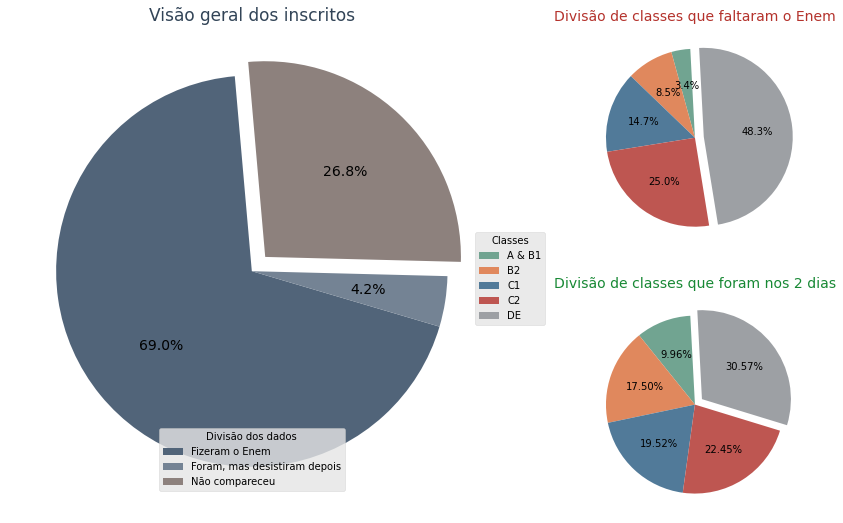

In [12]:
# Criação da figura, cores e definição da sua grade do layout
fig = plt.figure(figsize=(15,9))
specs = gridspec.GridSpec( nrows=2, ncols=3, figure=fig)
colors = ['#516479','#748394','#8D817D']

ax1 = fig.add_subplot( specs[ : , 0:2 ] )
ax2 = fig.add_subplot( specs[ 0 , 2 ] )
ax3 = fig.add_subplot( specs[ 1 , 2 ] )

# Criação das variaveis contendo os respectivos dados para a visualização e a criação da figura e sua localização de grade
faltou_tudo = df.loc[ (df["NOTA_LINGUAGENS"].isna()) & (df["NOTA_HUMANAS"].isna()) & (df["NOTA_MATEMATICA"].isna()) & (df["NOTA_NATUREZA"].isna()), ["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"] ].shape[0]
faltou_parcial = df.dropna(how="all", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0] - df.dropna(how="any", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0]
completou = df.dropna(how="any", subset=["NOTA_LINGUAGENS", "NOTA_HUMANAS", "NOTA_MATEMATICA", "NOTA_NATUREZA"]).shape[0]

ax1.pie([completou, faltou_parcial, faltou_tudo], startangle=95, explode=[0, 0, 0.1], autopct='%.1f%%', colors=colors, textprops={'fontsize': 14});
ax1.legend(['Fizeram o Enem', 'Foram, mas desistiram depois', 'Não compareceu'], title = 'Divisão dos dados', bbox_to_anchor=(0.7,0.19))
ax1.set_title('Visão geral dos inscritos', fontdict={'fontsize': 17}, color='#324457')

q2 = df.loc[ (df["NOTA_LINGUAGENS"].isna()) & (df["NOTA_HUMANAS"].isna()) & (df["NOTA_MATEMATICA"].isna()) & (df["NOTA_NATUREZA"].isna()), ['INSCRITO', 'CLASSE'] ].groupby('CLASSE').count().reset_index()
q2.loc[ 0 , 'INSCRITO'] = q2.loc[0,'INSCRITO'] + q2.loc[1,'INSCRITO']
q2.loc[ 0 , 'CLASSE'] = 'A & B1'
q2 = q2.drop(axis=1, index=1)
ax2.pie(q2['INSCRITO'], startangle=93, autopct='%.1f%%', explode=[0,0,0,0,0.1], colors=['#71A491', '#E0885D', '#517A99', '#BE5651', '#9DA0A4']); #, pctdistance=0.85
ax2.legend(['A & B1', 'B2', 'C1', 'C2', 'DE'], bbox_to_anchor=(-0.15,0.1), title = 'Classes')
ax2.set_title('Divisão de classes que faltaram o Enem', fontdict={'fontsize': 14}, color='#B4322C');
#ax2.axis('equal')

q3 = df.loc[ (df["NOTA_LINGUAGENS"].notna()) & (df["NOTA_HUMANAS"].notna()) & (df["NOTA_MATEMATICA"].notna()) & (df["NOTA_NATUREZA"].notna()), ['INSCRITO', 'CLASSE'] ].groupby('CLASSE').count().reset_index()
q3.loc[ 0 , 'INSCRITO'] = q3.loc[0,'INSCRITO'] + q3.loc[1,'INSCRITO']
q3.loc[ 0 , 'CLASSE'] = 'A & B1'
q3 = q3.drop(axis=1, index=1)
ax3.pie(q3['INSCRITO'], startangle=93, autopct='%.2f%%', explode=[0,0,0,0,0.1], colors=['#71A491', '#E0885D', '#517A99', '#BE5651', '#9DA0A4']);
ax3.set_title('Divisão de classes que foram nos 2 dias', fontdict={'fontsize': 14}, color='#188935');

# Salvamento da figura
fig.savefig('integrador01.png', format='png', dpi=125)


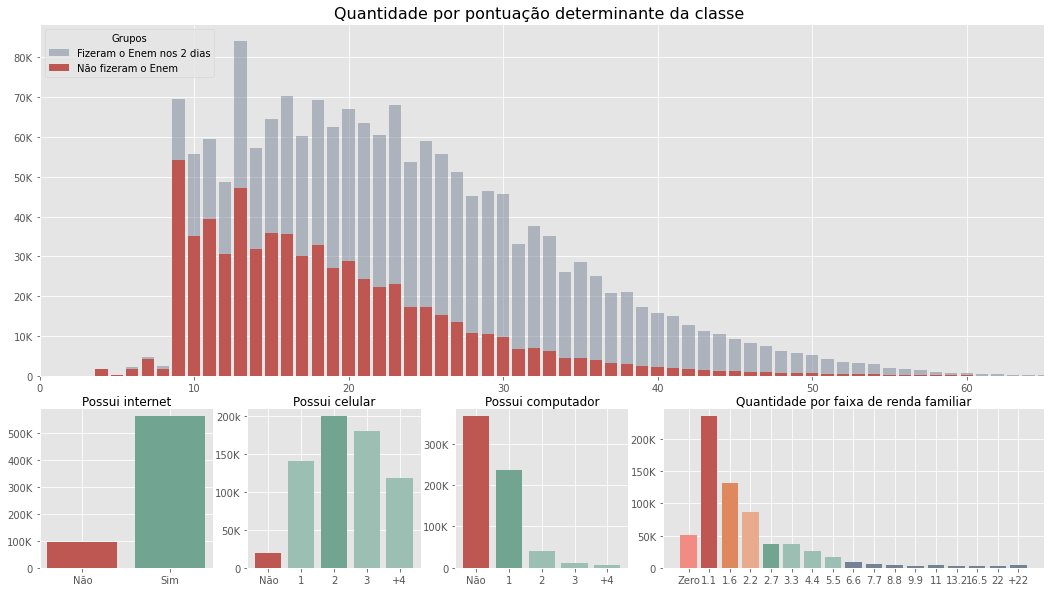

In [14]:
fig = plt.figure(figsize=(18,10))
specs = gridspec.GridSpec( nrows=3, ncols=5, figure=fig)
colors = ['#61764B','#9BA17B','#CFB997', 'FAD6A5', '395144']

ax1 = fig.add_subplot( specs[ :2 , : ] )
ax2 = fig.add_subplot( specs[ 2 , 0 ] )
ax3 = fig.add_subplot( specs[ 2 , 1 ] )
ax4 = fig.add_subplot( specs[ 2 , 2 ] )
ax5 = fig.add_subplot( specs[ 2 , 3: ] )

# ft simboliza falta
ft = df.loc[ (df["NOTA_LINGUAGENS"].isna()) & (df["NOTA_HUMANAS"].isna()) & (df["NOTA_MATEMATICA"].isna()) & (df["NOTA_NATUREZA"].isna()), : ]
# fo simboliza foram
fo = df.loc[ (df["NOTA_LINGUAGENS"].notna()) & (df["NOTA_HUMANAS"].notna()) & (df["NOTA_MATEMATICA"].notna()) & (df["NOTA_NATUREZA"].notna()), : ]

ft_ponts = ft[['INSCRITO', 'PONTOS']].groupby('PONTOS').count().reset_index()
fo_ponts = fo[['INSCRITO', 'PONTOS']].groupby('PONTOS').count().reset_index()
ax1.bar( fo_ponts['PONTOS'], fo_ponts['INSCRITO'], alpha=0.5, color='#748394' )
ax1.bar( ft_ponts['PONTOS'], ft_ponts['INSCRITO'], color='#BE5651' )
ax1.set_title('Quantidade por pontuação determinante da classe ', fontdict={'fontsize': 16});
ax1.legend(['Fizeram o Enem nos 2 dias', 'Não fizeram o Enem'], loc='upper left', title = 'Grupos')
ax1.set_yticklabels(['0', '10K', '20K', '30K', '40K', '50K', '60K', '70K', '80K']);
ax1.set_xlim(0,65)

ft_int = ft[['INSCRITO', 'INTERNET']].groupby('INTERNET').count().reset_index()
ax2.bar( ['Não', 'Sim'], ft_int['INSCRITO'], color=['#BE5651', '#71A491'] )
ax2.set_title('Possui internet', fontdict={'fontsize': 12}, y=0.98);
ax2.set_yticklabels(['0', '100K', '200K', '300K', '400K', '500K']);

ft_cel = ft[['INSCRITO', 'CELULAR']].groupby('CELULAR').count().reset_index()
ax3.bar( ['Não', '1', '2', '3', '+4'], ft_cel['INSCRITO'], color=['#BE5651', '#9BBFB2', '#71A491', '#9BBFB2', '#9BBFB2'] )
ax3.set_title('Possui celular', fontdict={'fontsize': 12}, y=0.98);
ax3.set_yticklabels(['0', '50K', '100K', '150K', '200k']);

ft_pc = ft[['INSCRITO', 'COMPUTADOR']].groupby('COMPUTADOR').count().reset_index()
ax4.bar( ['Não', '1', '2', '3', '+4'], ft_pc['INSCRITO'], color=['#BE5651', '#71A491', '#9BBFB2', '#9BBFB2', '#9BBFB2'] )
ax4.set_title('Possui computador', fontdict={'fontsize': 12}, y=0.98);
ax4.set_yticklabels(['0', '100K', '200K', '300K']);

# rd representa renda
ft_rd = ft[['INSCRITO', 'RENDA_FAMIL']].groupby('RENDA_FAMIL').count().reset_index()
ft_rd['RENDA_FAMIL'] = ft_rd['RENDA_FAMIL'].apply( lambda x: str(x))
ax5.bar( ft_rd['RENDA_FAMIL'], ft_rd['INSCRITO'], color=['#F28B82', '#BE5651', '#E0885D', '#E9AB8D', '#71A491', '#9BBFB2', '#9BBFB2', '#9BBFB2', '#748394', '#748394', '#748394', '#748394', '#748394', '#748394', '#748394', '#748394', '#748394'] )
ax5.set_title('Quantidade por faixa de renda familiar', fontdict={'fontsize': 12}, y=0.98);
ax5.set_xticklabels(['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '+22']);
ax5.set_yticklabels(['0', '50K', '100K', '150K', '200K']);
fig.savefig('integrador02.png', format='png', dpi=125)

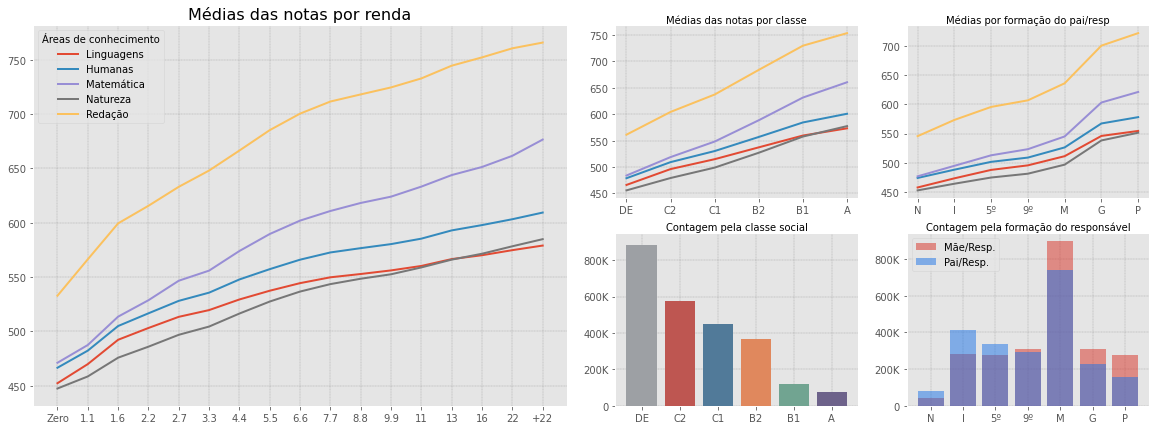

In [25]:
fig = plt.figure(figsize=(20,7))
specs = gridspec.GridSpec( nrows=2, ncols=4, figure=fig)

ax1 = fig.add_subplot( specs[ : , 0:2 ] )
ax2 = fig.add_subplot( specs[ 0 , 2 ] )
ax3 = fig.add_subplot( specs[ 0 , 3 ] )
ax4 = fig.add_subplot( specs[ 1 , 2 ] )
ax5 = fig.add_subplot( specs[ 1 , 3 ] )

q1 = ds[['PONTOS', 'RENDA_FAMIL', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('RENDA_FAMIL').mean().reset_index().sort_values('RENDA_FAMIL')
q1['RENDA_FAMIL'] = q1['RENDA_FAMIL'].apply(lambda x: str(x))
ax1.plot( ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13', '16', '22', '+22'], q1[['NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC']], linewidth = 2 );
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.legend(['Linguagens', 'Humanas', 'Matemática', 'Natureza', 'Redação'], loc='upper left', title = 'Áreas de conhecimento')
ax1.set_title('Médias das notas por renda', fontdict={'fontsize': 16});

q2 = ds[['PONTOS', 'CLASSE', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('CLASSE').mean().reset_index().sort_values('CLASSE', ascending=False)
ax2.plot( q2['CLASSE'], q2[['NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC']], linewidth = 2 );
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax2.set_title('Médias das notas por classe', fontdict={'fontsize': 10}, y=0.98);

q3 = ds[['PONTOS', 'CLASSE', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('FORMACAO_PAI_RPSV').mean().reset_index()
q3['SORT'] = [3,4,6,7,5,0,2,1]
q3 = q3.sort_values('SORT')
q3 = q3.drop(axis=1, index=7)
ax3.plot( ['N', 'I', '5º', '9º', 'M', 'G', 'P'], q3[['NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC']], linewidth = 2 );
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax3.set_title('Médias por formação do pai/resp', fontdict={'fontsize': 10}, y=0.98);

q4 = ds[['PONTOS', 'CLASSE', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('CLASSE').count().reset_index().sort_values('CLASSE', ascending=False)
ax4.bar( q4['CLASSE'], q4['PONTOS'], color=['#9DA0A4', '#BE5651', '#517A99', '#E0885D', '#71A491', '#6d628a'] );
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax4.set_title('Contagem pela classe social', fontdict={'fontsize': 10}, y=0.98);
ax4.set_ylim(0,950000)
ax4.set_yticklabels(['0', '200K', '400K', '600K', '800K']);

q5 = ds[['PONTOS', 'CLASSE', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('FORMACAO_PAI_RPSV').count().reset_index()
q5_1 = ds[['PONTOS', 'CLASSE', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'NOTA_REDAC', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV']].groupby('FORMACAO_MAE_RPSV').count().reset_index()
q5['SORT'] = [3,4,6,7,5,0,2,1]
q5 = q5.sort_values('SORT')
q5 = q5.drop(axis=1, index=7)
q5_1['SORT'] = [3,4,6,7,5,0,2,1]
q5_1 = q5_1.sort_values('SORT')
q5_1 = q5_1.drop(axis=1, index=7)
ax5.bar( ['N', 'I', '5º', '9º', 'M', 'G', 'P'], q5_1['PONTOS'], alpha=0.5, color='#D93025');
ax5.bar( ['N', 'I', '5º', '9º', 'M', 'G', 'P'], q5['PONTOS'], alpha=0.5, color='#1A73E8');
ax5.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax5.set_title('Contagem pela formação do responsável', fontdict={'fontsize': 10}, y=0.98)
#ax5.set_yticklabels(['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K']);
ax5.legend(['Mãe/Resp.', 'Pai/Resp.'], loc='upper left')
ax5.set_yticklabels(['0', '200K', '400K', '600K', '800K']);
fig.savefig('integrador03.png', format='png', dpi=125)

<BarContainer object of 6 artists>

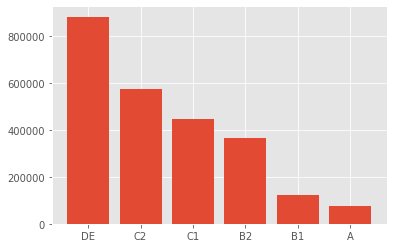

In [37]:
a = df[['CLASSE', 'INSCRITO']].groupby('CLASSE').count().reset_index().sort_values('CLASSE', ascending=False)
plt.bar( a['CLASSE'], a['INSCRITO'] )

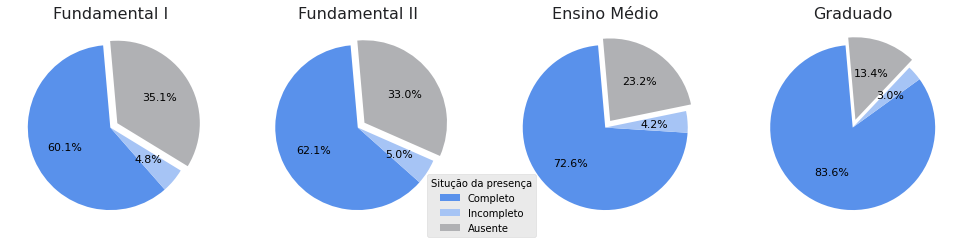

In [24]:
fig = plt.figure(figsize=(17,7))
specs = gridspec.GridSpec( nrows=1, ncols=4, figure=fig)
colors = ['#5991EB','#A6C4f5','#B0B1B4']

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 0 , 1 ] )
ax3 = fig.add_subplot( specs[ 0 , 2 ] )
ax4 = fig.add_subplot( specs[ 0 , 3 ] )


# Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental
resp2 = df.loc[ (df['FORMACAO_PAI_RPSV'] == 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental') & (df['FORMACAO_MAE_RPSV'] == 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental'), :]
fund1_flt = resp2.loc[(resp2['PRESENCA_LINGUAGENS'] == 'Faltou à prova') & (resp2['PRESENCA_HUMANAS'] == 'Faltou à prova') & (resp2['PRESENCA_MATEMATICA'] == 'Faltou à prova') & (resp2['PRESENCA_NATUREZA'] == 'Faltou à prova'), :]
fund1_foi = resp2.loc[(resp2['PRESENCA_LINGUAGENS'] == 'Presente na prova') & (resp2['PRESENCA_HUMANAS'] == 'Presente na prova') & (resp2['PRESENCA_MATEMATICA'] == 'Presente na prova') & (resp2['PRESENCA_NATUREZA'] == 'Presente na prova'), :]

ax1.pie( [fund1_foi.shape[0], resp2.shape[0] - (fund1_flt.shape[0] + fund1_foi.shape[0]), fund1_flt.shape[0] ], explode=[0, 0, 0.1], autopct='%.1f%%', colors=colors, textprops={'fontsize': 11}, startangle=95 )
ax1.set_title('Fundamental I', fontdict={'fontsize': 16}, color='#202124');

# Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio
resp3 = df.loc[ (df['FORMACAO_PAI_RPSV'] == 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio') & (df['FORMACAO_MAE_RPSV'] == 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio'), :]
fund2_flt = resp3.loc[(resp3['PRESENCA_LINGUAGENS'] == 'Faltou à prova') & (resp3['PRESENCA_HUMANAS'] == 'Faltou à prova') & (resp3['PRESENCA_MATEMATICA'] == 'Faltou à prova') & (resp3['PRESENCA_NATUREZA'] == 'Faltou à prova'), :]
fund2_foi = resp3.loc[(resp3['PRESENCA_LINGUAGENS'] == 'Presente na prova') & (resp3['PRESENCA_HUMANAS'] == 'Presente na prova') & (resp3['PRESENCA_MATEMATICA'] == 'Presente na prova') & (resp3['PRESENCA_NATUREZA'] == 'Presente na prova'), :]

ax2.pie( [fund2_foi.shape[0], resp3.shape[0] - (fund2_flt.shape[0] + fund2_foi.shape[0]), fund2_flt.shape[0] ], explode=[0, 0, 0.1], autopct='%.1f%%', colors=colors, textprops={'fontsize': 11}, startangle=95 )
ax2.set_title('Fundamental II', fontdict={'fontsize': 16}, color='#202124');
ax2.legend(['Completo', 'Incompleto', 'Ausente'], bbox_to_anchor=(0.81,0.3),  title='Situção da presença')

# Completou o Ensino Médio, mas não completou a Faculdade
resp4 = df.loc[ (df['FORMACAO_PAI_RPSV'] == 'Completou o Ensino Médio, mas não completou a Faculdade') & (df['FORMACAO_MAE_RPSV'] == 'Completou o Ensino Médio, mas não completou a Faculdade'), :]
medio_flt = resp4.loc[(resp4['PRESENCA_LINGUAGENS'] == 'Faltou à prova') & (resp4['PRESENCA_HUMANAS'] == 'Faltou à prova') & (resp4['PRESENCA_MATEMATICA'] == 'Faltou à prova') & (resp4['PRESENCA_NATUREZA'] == 'Faltou à prova'), :]
medio_foi = resp4.loc[(resp4['PRESENCA_LINGUAGENS'] == 'Presente na prova') & (resp4['PRESENCA_HUMANAS'] == 'Presente na prova') & (resp4['PRESENCA_MATEMATICA'] == 'Presente na prova') & (resp4['PRESENCA_NATUREZA'] == 'Presente na prova'), :]

ax3.pie( [medio_foi.shape[0], resp4.shape[0] - (medio_flt.shape[0] + medio_foi.shape[0]), medio_flt.shape[0] ], explode=[0, 0, 0.1], autopct='%.1f%%', colors=colors, textprops={'fontsize': 11}, startangle=95 )
ax3.set_title('Ensino Médio', fontdict={'fontsize': 16}, color='#202124');

# Completou o Ensino Médio, mas não completou a Faculdade
resp5 = df.loc[ (df['FORMACAO_PAI_RPSV'] == 'Completou a Faculdade, mas não completou a Pós-graduação') & (df['FORMACAO_MAE_RPSV'] == 'Completou a Faculdade, mas não completou a Pós-graduação'), :]
grad_flt = resp5.loc[(resp5['PRESENCA_LINGUAGENS'] == 'Faltou à prova') & (resp5['PRESENCA_HUMANAS'] == 'Faltou à prova') & (resp5['PRESENCA_MATEMATICA'] == 'Faltou à prova') & (resp5['PRESENCA_NATUREZA'] == 'Faltou à prova'), :]
grad_foi = resp5.loc[(resp5['PRESENCA_LINGUAGENS'] == 'Presente na prova') & (resp5['PRESENCA_HUMANAS'] == 'Presente na prova') & (resp5['PRESENCA_MATEMATICA'] == 'Presente na prova') & (resp5['PRESENCA_NATUREZA'] == 'Presente na prova'), :]

ax4.pie( [grad_foi.shape[0], resp5.shape[0] - (grad_flt.shape[0] + grad_foi.shape[0]), grad_flt.shape[0] ], explode=[0, 0, 0.1], autopct='%.1f%%', colors=colors, textprops={'fontsize': 11}, startangle=95 )
ax4.set_title('Graduado', fontdict={'fontsize': 16}, color='#202124');
fig.savefig('integrador04.png', format='png', dpi=125)

In [17]:
15 % 9

6

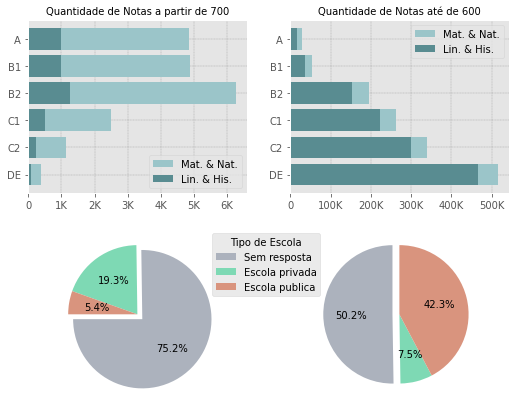

In [59]:
fig = plt.figure(figsize=(18,7))
specs = gridspec.GridSpec( nrows=2, ncols=4, figure=fig)

nota_abaixo = 600
nota_apartir = 700

ax2 = fig.add_subplot( specs[ 0 , 2 ] )
ax3 = fig.add_subplot( specs[ 0 , 3 ] )
ax4 = fig.add_subplot( specs[ 1 , 2 ] )
ax5 = fig.add_subplot( specs[ 1 , 3 ] )

q1 = ds

q2 = ds.loc[ (df['NOTA_MATEMATICA'] >= nota_apartir ) & (df['NOTA_NATUREZA'] >= nota_apartir), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q2 = q2.groupby('CLASSE').count().reset_index().sort_values('CLASSE', ascending=False)
q2_1 = ds.loc[ (df['NOTA_LINGUAGENS'] >= nota_apartir ) & (df['NOTA_HUMANAS'] >= nota_apartir), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q2_1 = q2_1.groupby('CLASSE').count().reset_index().sort_values('CLASSE', ascending=False)
ax2.barh( q2['CLASSE'] , q2['TIPO_ESC'], color='#9BC5C9')
ax2.barh( q2_1['CLASSE'] , q2_1['TIPO_ESC'], color='#598C91')
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax2.set_xticklabels(['0', '1K', '2K', '3K', '4K', '5K', '6K']);
ax2.set_title(f'Quantidade de Notas a partir de {nota_apartir}', fontdict={'fontsize': 10});
ax2.legend(['Mat. & Nat.', 'Lin. & His.'], loc='lower right')

q3 = ds.loc[ (df['NOTA_MATEMATICA'] <= nota_abaixo ) & (df['NOTA_NATUREZA'] <= nota_abaixo), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q3 = q3.groupby('CLASSE').count().reset_index().sort_values('CLASSE', ascending=False)
q3_1 = ds.loc[ (df['NOTA_LINGUAGENS'] <= nota_abaixo ) & (df['NOTA_HUMANAS'] <= nota_abaixo), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q3_1 = q3_1.groupby('CLASSE').count().reset_index().sort_values('CLASSE', ascending=False)
ax3.barh( q3_1['CLASSE'] , q3_1['TIPO_ESC'], color='#9BC5C9')
ax3.barh( q3['CLASSE'] , q3['TIPO_ESC'], color='#598C91')
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax3.set_xticklabels(['0', '100K', '200K', '300K', '400K', '500K']);
ax3.set_title(f'Quantidade de Notas até de {nota_abaixo}', fontdict={'fontsize': 10});
ax3.legend(['Mat. & Nat.', 'Lin. & His.'], loc='upper right');

q4 = ds.loc[ (df['NOTA_MATEMATICA'] >= nota_apartir ) & (df['NOTA_NATUREZA'] >= nota_apartir), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q4 = q4.groupby('TIPO_ESC').count()
ax4.pie(q4['CLASSE'], colors=['#ACB2BD', '#7ed9b4', '#D9947E'], startangle=180, explode=[0.1, 0, 0], autopct='%.1f%%');
ax4.legend(['Sem resposta', 'Escola privada', 'Escola publica'], bbox_to_anchor=(0.9,1),  title='Tipo de Escola')

q5 = ds.loc[ (df['NOTA_LINGUAGENS'] <= nota_abaixo ) & (df['NOTA_HUMANAS'] <= nota_abaixo), ['CLASSE', 'TIPO_ESC', 'NOTA_REDAC', 'NOTA_LINGUAGENS', 'NOTA_HUMANAS', 'NOTA_MATEMATICA', 'NOTA_NATUREZA', 'FORMACAO_PAI_RPSV', 'FORMACAO_MAE_RPSV', 'RENDA_FAMIL' ] ]
q5 = q5.groupby('TIPO_ESC').count()
ax5.pie(q5['CLASSE'], colors=['#ACB2BD', '#7ed9b4', '#D9947E'], startangle=90, explode=[0.1, 0, 0], autopct='%.1f%%');
fig.savefig('foo.png')

fig.savefig('integrador05.png', format='png', dpi=125)

# Células Arquivadas
### As células abaixo utilizam os mesmos dados, porém, tratados de uma maneira diferente
### Para não haver problemas com colunas e valores, trates os dados brutos, não use os dados já tratados

## **Execuçã de Análise Anteriores**
* Podem conter erros e problemas pois algumas não foram terminas
* Arquivamentos da análise anterior

In [ ]:
ques14

In [ ]:
#### Criação desses grupos para Análise

#### Dados dos Individuos que Faltaram algum dia ####

falt_alg = df.loc[ (df["NU_NOTA_CH"].isna()) | (df["NU_NOTA_LC"].isna()) | (df["NU_NOTA_MT"].isna()) | (df["NU_NOTA_CN"].isna()), : ].dropna(how="all", subset=["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_CN"]).reset_index(drop=True)
#falt_alg.to_csv('FaltaramAlgumDia.csv', sep=';', encoding='latin-1')

#### Dados dos Individuos que não fizeram o Enem ####

falt_tudo = df.loc[ (df["NU_NOTA_CH"].isna()) & (df["NU_NOTA_LC"].isna()) & (df["NU_NOTA_MT"].isna()) & (df["NU_NOTA_CN"].isna()), : ].reset_index(drop=True)
#falt_tudo.to_csv('FaltaramTudo.csv', sep=';', encoding='latin-1')

#### Completaram todo o Enem ####

completo = df.dropna(how="any", subset=["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_CN"]).reset_index(drop=True)
#completo.to_csv('FaltaramTudo.csv', sep=';', encoding='latin-1')

In [ ]:
### O Pai que nunca aestudou, qual a quantidade de pessoas que tiraram uma nota boa e qual a situação delas?
que1 = df.loc[(df['NU_NOTA_CH'] >= 700) & (df['NU_NOTA_LC'] >= 700) & (df['NU_NOTA_MT'] >= 700) & (df['NU_NOTA_CN'] >= 700), ['Q006', 'Q001']].groupby('Q001').count().reset_index()
que1['Sort'] = [4,5,4,8,6,1,3,2]
que1 = que1.sort_values('Sort').reset_index(drop=True)


plt.bar( ['Nunca', 'Não Sabe', 'Incomp. I', 'Fund. I', 'Fund. II', 'Médio', 'Graduado', 'PosGrad.' ], ques['Q006'] )
plt.grid(color = 'grey', linewidth = 0.3)
plt.title('Contagem de Boas Notas por Grau de Formação do Pai')

In [ ]:
display(df.loc[(df['Q001'] == 'Nunca estudou') & (df['NU_NOTA_CH'] >= 700) & (df['NU_NOTA_LC'] >= 700) & (df['NU_NOTA_MT'] >= 700) & (df['NU_NOTA_CN'] >= 700), ['Q006', 'Q001', 'Q002', 'NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'Q005']])

In [ ]:
'''
### Análise dos Individuos com boas Notas | Acima de 700
* Vemos que a minoria que adquiri um anota suficientemente boa para entrar
na faculdade é por grande parte dos inscritos que possuem uma renda superior
a 3.300 RS, uma renda baixa, mas suficiente somente para suas necessidades básicas'''

boas = df.loc[ (df['NU_NOTA_REDACAO'] >= 700) & (df['NU_NOTA_CH'] >= 700) & (df['NU_NOTA_LC'] >= 700) & (df['NU_NOTA_MT'] >= 700) & (df['NU_NOTA_CN'] >= 700), : ]
ruins = df.loc[ (df['NU_NOTA_REDACAO'] <= 450) & (df['NU_NOTA_CH'] <= 450) & (df['NU_NOTA_LC'] <= 450) & (df['NU_NOTA_MT'] <= 450) & (df['NU_NOTA_CN'] <= 450), : ]

grau_pai = df[['Q001','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby('Q001').mean().reset_index().sort_values('Q001')
grau_pai['Sort'] = ['D', 'E', 'G', 'H', 'F', 'A', 'C', 'B']
grau_pai = grau_pai.sort_values('Sort')
grau_x = ['Nunca', 'Não Sabe', 'Incomp. I', 'Fund. I', 'Fund. II', 'Médio', 'Graduado', 'PosGrad.' ]
grau_leg = ['Redação', 'Humanas', 'Linguagens', 'Matemática', 'Natureza']

boas1 = boas[['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby('Q006').count().reset_index()
boas1['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
boas1 = boas1.sort_values('Sort')

ruins1 = ruins[['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby('Q006').count().reset_index()
ruins1['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
ruins1 = ruins1.sort_values('Sort')

todos = df[['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby('Q006').count().reset_index()
todos['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
todos = todos.sort_values('Sort')

fig = plt.figure(figsize=(18,11))
specs = gridspec.GridSpec( nrows=3, ncols=3, figure=fig)

ax1 = fig.add_subplot( specs[ :2 , 0:2 ] )
ax2 = fig.add_subplot( specs[ 0 , 2 ] )
ax3 = fig.add_subplot( specs[ 1 , 2 ] )
ax4 = fig.add_subplot( specs[ 2 , 0 ] )
ax5 = fig.add_subplot( specs[ 2 , 1 ] )
ax6 = fig.add_subplot( specs[ 2 , 2 ] )

ax1.plot(grau_x, grau_pai[['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']], linewidth = 2)
ax1.legend(grau_leg, loc='upper left')
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title('Médias das Notas por Formação do Pai')

ax2.bar( label, boas1['NU_NOTA_REDACAO'], color='springgreen' )
ax2.grid(color = 'grey', linewidth = 0.3)
ax2.set_title('Notas de Totas as Matérias acima de 700')
ax2.legend(grau_leg, loc='upper left')


ax3.bar( label, ruins1['NU_NOTA_REDACAO'], color='salmon' )
ax3.grid(color = 'grey', linewidth = 0.3)
ax3.set_title('Notas Totas as Matérias abaixo de 450')

In [ ]:
'''
### Analise dos Inscritos sem Renda
Quantidade de Inscritos sem Renda: 143246 (5.8% do total)
* Ao analisar a frequencia de inscritos pelo critério de separação pela sua nota pela sua renda, vemos que 
'''

sren = df.loc[ df['Q006'] == 'Nenhuma Renda', :].reset_index(drop=True)
display(sren.loc[ (sren['Q001'] == 'Nunca estudou') & (sren['Q002'] == 'Nunca estudou'), ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ] )

In [ ]:
### Grau de Formação do Pai em Relação a Nota do Participante
q1 = df[['Q001','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby('Q001').mean().reset_index().sort_values('Q001')
q1['Sort'] = ['D', 'E', 'G', 'H', 'F', 'A', 'C', 'B']
q1 = q1.sort_values('Sort')
q1_label = ['Nunca', 'Não Sabe', 'Incomp. I', 'Fund. I', 'Fund. II', 'Médio', 'Graduado', 'PosGrad.' ]
q1_mat = ['Redação', 'Humanas', 'Linguagens', 'Matemática', 'Natureza']
q1_group = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'Não sei']

q2 = df[['Q001', 'NU_NOTA_CN']].groupby('Q001').count().reset_index().sort_values('Q001')
q2['Sort'] = ['D', 'E', 'G', 'H', 'F', 'A', 'C', 'B']
q2 = q2.sort_values('Sort')
q2[['Q001', 'NU_NOTA_CN']]

q6 = df[['Q001', 'Q003', 'NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].groupby(['Q001', 'Q003']).mean().reset_index()

fig = plt.figure( figsize=(40,13) )
specs = gridspec.GridSpec( nrows=4 , ncols=8 , figure=fig )

ax1 = fig.add_subplot( specs[ :2 , 0:2 ] )

ax2 = fig.add_subplot( specs[ 0 , 2 ] )
ax3 = fig.add_subplot( specs[ 0 , 3 ] )
ax4 = fig.add_subplot( specs[ 1 , 2 ] )
ax5 = fig.add_subplot( specs[ 1 , 3 ] )

ax6 = fig.add_subplot( specs[ 2 , 0 ] )
ax7 = fig.add_subplot( specs[ 2 , 1 ] )
ax8 = fig.add_subplot( specs[ 2 , 2 ] )
ax9 = fig.add_subplot( specs[ 2 , 3 ] )
ax10 = fig.add_subplot( specs[ 3 , 0 ] )
ax11 = fig.add_subplot( specs[ 3 , 1 ] )
ax12 = fig.add_subplot( specs[ 3 , 2 ] )
ax13 = fig.add_subplot( specs[ 3 , 3 ] )

ax1.plot(q1_label, q1[['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']], linewidth = 2)
ax1.legend(q1_mat, loc='upper left')
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title('Médias das Notas por Formação do Pai')

ax2.figsize=(10,10)
ax2.pie( q2['NU_NOTA_CN'], autopct='%.0f%%', labeldistance=1.2 )
ax2.legend(labels=q1_label, loc='upper left', bbox_to_anchor=(-0.5,1))

ax6.plot( q1_group, q6.loc[ :5, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax6.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax6.set_title(q1_group[0])

ax7.plot( q1_group, q6.loc[ 6:11, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax7.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax7.set_title(q1_group[1])

ax8.plot( q1_group, q6.loc[ 12:17, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax8.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax8.set_title(q1_group[2])

ax9.plot( q1_group, q6.loc[ 18:23, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax9.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax9.set_title(q1_group[3])

ax10.plot( q1_group, q6.loc[ 24:29, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax10.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax10.set_title(q1_group[4])

ax11.plot( q1_group, q6.loc[ 30:35, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax11.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax11.set_title(q1_group[5])

ax12.plot( q1_group, q6.loc[ 36:41, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax12.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax12.set_title(q1_group[6])

ax13.plot( q1_group, q6.loc[ 42:, ['NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']] )
ax13.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax13.set_title(q1_group[7])

In [ ]:
q1 = df[['Q001', 'Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].sort_values(['Q001', 'Q006'])

q1a = q1.loc[ q1['Q001'] == 'Não sei' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1a['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1a = q1a.sort_values('Sort')

q1b = q1.loc[ q1['Q001'] == 'Nunca estudou' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1b['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1b = q1b.sort_values('Sort')

q1c = q1.loc[ q1['Q001'] == 'Não completou a 4ª série/5º ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1c['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1c = q1c.sort_values('Sort')

q1d = q1.loc[ q1['Q001'] == 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1d['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1d = q1d.sort_values('Sort')

q1e = q1.loc[ q1['Q001'] == 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1e['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1e = q1e.sort_values('Sort')

q1f = q1.loc[ q1['Q001'] == 'Completou o Ensino Médio, mas não completou a Faculdade' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1f['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1f = q1f.sort_values('Sort')

q1g = q1.loc[ q1['Q001'] == 'Completou a Faculdade, mas não completou a Pós-graduação' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1g['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1g = q1g.sort_values('Sort')

q1h = q1.loc[ q1['Q001'] == 'Completou a Pós-graduação' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1h['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1h = q1h.sort_values('Sort')


In [ ]:
### Separação do Tipo de Escola em relação a Média das Nota
label = ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '> 22' ]
com = completo[['TP_ESCOLA', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'Q006']].groupby(['TP_ESCOLA', 'Q006']).mean().reset_index()

nores = com.loc[ :16 , : ]
priva = com.loc[ 17:33 , : ]
publi = com.loc[ 34:50 , : ]

nores['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
priva['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
publi['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']

nores = nores.sort_values('Sort')
priva = priva.sort_values('Sort')
publi = publi.sort_values('Sort')

fig = plt.figure( figsize=(20,4) )
specs = gridspec.GridSpec( nrows=1 , ncols=3 , figure=fig )

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 0 , 1 ] )
ax3 = fig.add_subplot( specs[ 0 , 2 ] )

ax1.plot( label , nores[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] )
ax1.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title(nores['TP_ESCOLA'].unique()[0])
ax1.set_ylim(400,850)

ax2.plot( label , priva[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] )
ax2.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax2.set_title(priva['TP_ESCOLA'].unique()[0])
ax2.set_ylim(400,850)

ax3.plot( label , publi[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] )
ax3.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax3.set_title(publi['TP_ESCOLA'].unique()[0])
ax3.set_ylim(400,850);

In [ ]:
a = df[['NU_INSCRICAO', 'Q006']].groupby('Q006').count()
a['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
a = a.sort_values('Sort').reset_index()
plt.figure( figsize=(10,10) )

plt.pie(a['NU_INSCRICAO'], labels=label);

In [ ]:
### Formação do Pai

q1 = df[['Q001', 'Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].sort_values('Q001')
q1a = q1.loc[ q1['Q001'] == 'Não sei' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1b = q1.loc[ q1['Q001'] == 'Nunca estudou' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1c = q1.loc[ q1['Q001'] == 'Não completou a 4ª série/5º ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1d = q1.loc[ q1['Q001'] == 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1e = q1.loc[ q1['Q001'] == 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1f = q1.loc[ q1['Q001'] == 'Completou o Ensino Médio, mas não completou a Faculdade' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1g = q1.loc[ q1['Q001'] == 'Completou a Faculdade, mas não completou a Pós-graduação' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1h = q1.loc[ q1['Q001'] == 'Completou a Pós-graduação' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()

In [ ]:
label = ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '> 22' ]
plt.figure( figsize=(18,9) )

q1 = df[['Q001', 'Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN']].sort_values('Q001')
q1a = q1.loc[ q1['Q001'] == 'Não sei' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1b = q1.loc[ q1['Q001'] == 'Nunca estudou' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1c = q1.loc[ q1['Q001'] == 'Não completou a 4ª série/5º ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1d = q1.loc[ q1['Q001'] == 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1e = q1.loc[ q1['Q001'] == 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1f = q1.loc[ q1['Q001'] == 'Completou o Ensino Médio, mas não completou a Faculdade' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1g = q1.loc[ q1['Q001'] == 'Completou a Faculdade, mas não completou a Pós-graduação' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()
q1h = q1.loc[ q1['Q001'] == 'Completou a Pós-graduação' , ['Q006','NU_NOTA_REDACAO' ,'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN'] ].groupby('Q006').mean().reset_index()

q1a['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1b['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1c['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1d['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1e['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1f['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1g['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
q1h['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
    
q1a['MEDIA'] = (q1a['NU_NOTA_REDACAO'] + q1a['NU_NOTA_CH'] + q1a['NU_NOTA_LC'] + q1a['NU_NOTA_MT'] + q1a['NU_NOTA_CN']) / 5
q1b['MEDIA'] = (q1b['NU_NOTA_REDACAO'] + q1b['NU_NOTA_CH'] + q1b['NU_NOTA_LC'] + q1b['NU_NOTA_MT'] + q1b['NU_NOTA_CN']) / 5
q1c['MEDIA'] = (q1c['NU_NOTA_REDACAO'] + q1c['NU_NOTA_CH'] + q1c['NU_NOTA_LC'] + q1c['NU_NOTA_MT'] + q1c['NU_NOTA_CN']) / 5
q1d['MEDIA'] = (q1d['NU_NOTA_REDACAO'] + q1d['NU_NOTA_CH'] + q1d['NU_NOTA_LC'] + q1d['NU_NOTA_MT'] + q1d['NU_NOTA_CN']) / 5
q1e['MEDIA'] = (q1e['NU_NOTA_REDACAO'] + q1e['NU_NOTA_CH'] + q1e['NU_NOTA_LC'] + q1e['NU_NOTA_MT'] + q1e['NU_NOTA_CN']) / 5
q1f['MEDIA'] = (q1f['NU_NOTA_REDACAO'] + q1f['NU_NOTA_CH'] + q1f['NU_NOTA_LC'] + q1f['NU_NOTA_MT'] + q1f['NU_NOTA_CN']) / 5
q1g['MEDIA'] = (q1g['NU_NOTA_REDACAO'] + q1g['NU_NOTA_CH'] + q1g['NU_NOTA_LC'] + q1g['NU_NOTA_MT'] + q1g['NU_NOTA_CN']) / 5
q1h['MEDIA'] = (q1h['NU_NOTA_REDACAO'] + q1h['NU_NOTA_CH'] + q1h['NU_NOTA_LC'] + q1h['NU_NOTA_MT'] + q1h['NU_NOTA_CN']) / 5

q1a = q1a.sort_values('Sort')
q1b = q1b.sort_values('Sort')
q1c = q1c.sort_values('Sort')
q1d = q1d.sort_values('Sort')
q1e = q1e.sort_values('Sort')
q1f = q1f.sort_values('Sort')
q1g = q1g.sort_values('Sort')
q1h = q1h.sort_values('Sort')

plt.plot( label, q1a['MEDIA'] )
plt.plot( label, q1b['MEDIA'] )
plt.plot( label, q1c['MEDIA'] )
plt.plot( label, q1d['MEDIA'] )
plt.plot( label, q1e['MEDIA'] )
plt.plot( label, q1f['MEDIA'] )
plt.plot( label, q1g['MEDIA'] )
plt.plot( label, q1h['MEDIA'] )

legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right')

In [ ]:
### Crescimento das Médias em relação a Faixa de Renda | Faixa Etária

label = ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '> 22' ]
df2 = df[['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'Q006']].dropna(how='all', subset=['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'])

fe1 = df2.loc[(df2['TP_FAIXA_ETARIA'] == '17 anos') | (df2['TP_FAIXA_ETARIA'] == '18 anos') | (df2['TP_FAIXA_ETARIA'] == '19 anos'), ['Q006', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'] ].groupby('Q006').mean().reset_index()
fe2 = df2.loc[(df2['TP_FAIXA_ETARIA'] == '20 anos') | (df2['TP_FAIXA_ETARIA'] == '21 anos') | (df2['TP_FAIXA_ETARIA'] == '22 anos'), ['Q006', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'] ].groupby('Q006').mean().reset_index()
fe3 = df2.loc[(df2['TP_FAIXA_ETARIA'] == '23 anos') | (df2['TP_FAIXA_ETARIA'] == '24 anos') | (df2['TP_FAIXA_ETARIA'] == '25 anos'), ['Q006', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'] ].groupby('Q006').mean().reset_index()
fe4 = df2.loc[: , ['Q006', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'] ].groupby('Q006').mean().reset_index()

# Serve para ordenar os valores
fe1['Renda'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe2['Renda'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe3['Renda'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe4['Renda'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']

fe1 = fe1.sort_values('Renda')
fe2 = fe2.sort_values('Renda')
fe3 = fe3.sort_values('Renda')
fe4 = fe4.sort_values('Renda')

fig = plt.figure( figsize=(20,10) )
specs = gridspec.GridSpec( nrows=2 , ncols=2 , figure=fig )

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 0 , 1 ] )
ax3 = fig.add_subplot( specs[ 1 , 0 ] )
ax4 = fig.add_subplot( specs[ 1 , 1 ] )

ax1.plot( label, fe1[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] );
ax1.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title("17, 18 e 19 anos")
ax1.set_ylim(400,850)

ax2.plot( label, fe2[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] );
ax2.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3);
ax2.set_title("20, 21 e 22 anos")
ax2.set_ylim(400,850)

ax3.plot( label, fe3[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] );
ax3.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3);
ax3.set_title("23, 24 e 25 anos")
ax3.set_ylim(400,850)

ax4.plot( label, fe4[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] );
ax4.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.3);
ax4.set_title("Todos os inscritos")
ax4.set_ylim(400,850);


In [ ]:
for col in ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']:
    df2 = df[['NU_INSCRICAO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', col]].groupby(col).mean().reset_index()
    plt.plot( list(df2[col].unique()), df2[['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']] )
    plt.title(col)
    plt.xticks(rotation = -90)
    plt.yticks(rotation = 0)
    plt.show()

In [ ]:
### Formação | Pai
#### Até que série seu pai, ou o homem responsável por você, estudou?

df2 = df[['TP_FAIXA_ETARIA', 'TP_SEXO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'Q001', 'Q006']].groupby(['Q001', 'Q006']).mean().reset_index()
df2.columns = ['Condição_Pai', 'Renda', 'Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']
label = ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '> 22' ]

fe1 = df2.loc[:16 , :]
fe2 = df2.loc[17:33 , :]
fe3 = df2.loc[34:50 , :]
fe4 = df2.loc[51:67 , :]
fe5 = df2.loc[68:84 , :]
fe6 = df2.loc[85:101 , :]
fe7 = df2.loc[102:118 , :]
fe8 = df2.loc[119:135 , :]

# Serve para ordenar os valores
fe1['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe2['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe3['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe4['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe5['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe6['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe7['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe8['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']

fe1 = fe1.sort_values('Sort').reset_index(drop=True)
fe2 = fe2.sort_values('Sort').reset_index(drop=True)
fe3 = fe3.sort_values('Sort').reset_index(drop=True)
fe4 = fe4.sort_values('Sort').reset_index(drop=True)
fe5 = fe5.sort_values('Sort').reset_index(drop=True)
fe6 = fe6.sort_values('Sort').reset_index(drop=True)
fe7 = fe7.sort_values('Sort').reset_index(drop=True)
fe8 = fe8.sort_values('Sort').reset_index(drop=True)

fig = plt.figure( figsize=(22,33) )
specs = gridspec.GridSpec( nrows=4 , ncols=2 , figure=fig )

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 1 , 0 ] )
ax3 = fig.add_subplot( specs[ 2 , 0 ] )
ax4 = fig.add_subplot( specs[ 3 , 0 ] )
ax5 = fig.add_subplot( specs[ 0 , 1 ] )
ax6 = fig.add_subplot( specs[ 1 , 1 ] )
ax7 = fig.add_subplot( specs[ 2 , 1 ] )
ax8 = fig.add_subplot( specs[ 3 , 1 ] )

ax1.plot( label , fe1[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax1.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title(fe1['Condição_Pai'].unique()[0])
ax1.set_ylim(430,800)

ax2.plot( label , fe2[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax2.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax2.set_title(fe2['Condição_Pai'].unique()[0])
ax2.set_ylim(430,800)

ax3.plot( label , fe3[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax3.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax3.set_title(fe3['Condição_Pai'].unique()[0])
ax3.set_ylim(430,800)

ax4.plot( label , fe4[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax4.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax4.set_title(fe4['Condição_Pai'].unique()[0])
ax4.set_ylim(430,800)

ax5.plot( label , fe5[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax5.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax5.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax5.set_title(fe5['Condição_Pai'].unique()[0])
ax5.set_ylim(430,800)

ax6.plot( label , fe6[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax6.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax6.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax6.set_title(fe6['Condição_Pai'].unique()[0])
ax6.set_ylim(430,800)

ax7.plot( label , fe7[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax7.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax7.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax7.set_title(fe7['Condição_Pai'].unique()[0])
ax7.set_ylim(430,800)

ax8.plot( label , fe8[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax8.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax8.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax8.set_title(fe8['Condição_Pai'].unique()[0])
ax8.set_ylim(430,800)

plt.show()

In [ ]:
### Formação | Mãe
#### Até que série sua mãe, ou a mulher responsável por você, estudou?

df2 = df[['TP_FAIXA_ETARIA', 'TP_SEXO', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO', 'Q002', 'Q006']].groupby(['Q002', 'Q006']).mean().reset_index()
df2.columns = ['Condição_Pai', 'Renda', 'Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']
label = ['Zero', '1.1', '1.6', '2.2', '2.7', '3.3', '4.4', '5.5', '6.6', '7.7', '8.8', '9.9', '11', '13.2', '16.5', '22', '> 22' ]

fe1 = df2.loc[:16 , :]
fe2 = df2.loc[17:33 , :]
fe3 = df2.loc[34:50 , :]
fe4 = df2.loc[51:67 , :]
fe5 = df2.loc[68:84 , :]
fe6 = df2.loc[85:101 , :]
fe7 = df2.loc[102:118 , :]
fe8 = df2.loc[119:135 , :]

# Serve para ordenar os valores
fe1['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe2['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe3['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe4['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe5['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe6['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe7['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']
fe8['Sort'] = ['Q', 'B', 'C', 'D', 'N', 'O', 'P', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'A']


fe1 = fe1.sort_values('Sort').reset_index(drop=True)
fe2 = fe2.sort_values('Sort').reset_index(drop=True)
fe3 = fe3.sort_values('Sort').reset_index(drop=True)
fe4 = fe4.sort_values('Sort').reset_index(drop=True)
fe5 = fe5.sort_values('Sort').reset_index(drop=True)
fe6 = fe6.sort_values('Sort').reset_index(drop=True)
fe7 = fe7.sort_values('Sort').reset_index(drop=True)
fe8 = fe8.sort_values('Sort').reset_index(drop=True)

fig = plt.figure( figsize=(22,33) )
specs = gridspec.GridSpec( nrows=4 , ncols=2 , figure=fig )

ax1 = fig.add_subplot( specs[ 0 , 0 ] )
ax2 = fig.add_subplot( specs[ 1 , 0 ] )
ax3 = fig.add_subplot( specs[ 2 , 0 ] )
ax4 = fig.add_subplot( specs[ 3 , 0 ] )
ax5 = fig.add_subplot( specs[ 0 , 1 ] )
ax6 = fig.add_subplot( specs[ 1 , 1 ] )
ax7 = fig.add_subplot( specs[ 2 , 1 ] )
ax8 = fig.add_subplot( specs[ 3 , 1 ] )

ax1.plot( label , fe1[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax1.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax1.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax1.set_title(fe1['Condição_Pai'].unique()[0])
ax1.set_ylim(430,800)

ax2.plot( label , fe2[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax2.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax2.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax2.set_title(fe2['Condição_Pai'].unique()[0])
ax2.set_ylim(430,800)

ax3.plot( label , fe3[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax3.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax3.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax3.set_title(fe3['Condição_Pai'].unique()[0])
ax3.set_ylim(430,800)

ax4.plot( label , fe4[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax4.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax4.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax4.set_title(fe4['Condição_Pai'].unique()[0])
ax4.set_ylim(430,800)

ax5.plot( label , fe5[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax5.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax5.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax5.set_title(fe5['Condição_Pai'].unique()[0])
ax5.set_ylim(430,800)

ax6.plot( label , fe6[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax6.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax6.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax6.set_title(fe6['Condição_Pai'].unique()[0])
ax6.set_ylim(430,800)

ax7.plot( label , fe7[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax7.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax7.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax7.set_title(fe7['Condição_Pai'].unique()[0])
ax7.set_ylim(430,800)

ax8.plot( label , fe8[['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação']])
ax8.legend(['Humanas', 'Linguagens', 'Matemática', 'Natureza', 'Redação'], loc='lower right');
ax8.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
ax8.set_title(fe8['Condição_Pai'].unique()[0])
ax8.set_ylim(430,800)

fig.show();

### Exportação de Dados

In [ ]:
'''df.to_csv('IntegradorEnem.csv', encoding='latin-1', sep = ";")
falt_alg.to_csv('Inacabado.csv', encoding='latin-1', sep = ";")
falt_tudo.to_csv('Desistiu.csv', encoding='latin-1', sep = ";")
completo.to_csv('Completaram.csv', encoding='latin-1', sep = ";")'''

### Exportação o Para o Power BI

In [ ]:
"""
pbi = df
pbi['NU_NOTA_CH'] = pbi['NU_NOTA_CH'].apply( lambda x : -50 if x != x else x )
pbi['NU_NOTA_LC'] = pbi['NU_NOTA_LC'].apply( lambda x : -50 if x != x else x )
pbi['NU_NOTA_MT'] = pbi['NU_NOTA_MT'].apply( lambda x : -50 if x != x else x )
pbi['NU_NOTA_CN'] = pbi['NU_NOTA_CN'].apply( lambda x : -50 if x != x else x )
pbi['NU_NOTA_REDACAO'] = pbi['NU_NOTA_REDACAO'].apply( lambda -50 : 0 if x != x else x )

pbi = pbi[['NU_INSCRICAO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_CN', 'TP_PRESENCA_MT', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']]
pbi.columns = ['Jovem_ID', 'Situação_Conclusão_Escolar', 'Ano_de_Conclusão_Escolar', 'Tipo_Escolar', 'Nome_Município_da_aplicação_da_Prova', 'UF_da_aplicação_Prova', 'Presença_Humanas_1', 'Presença_Linguagens_1', 'Presença_Natureza_2', 'Presença_Matemática_2', 'Nota_Humanas_1', 'Nota_Linguagens_1', 'Nota_Redação_1', 'Nota_Natureza_2', 'Nota_Matemática_2', 'Tipo_Lingua', 'Status_Redação', 'Série_Pai_ou_responsável_estudou?', 'Série_Mae_ou_responsável_estudou', 'Grupo_ocupação_Pai', 'Grupo_ocupação_Mae', 'Quant_moram_Residência?', 'Renda_mensal_Familiar', 'Empregado_Doméstico', 'Banheiro', 'Quartos', 'Carro', 'Motocicleta', 'Geladeira', 'Freezer', 'Máquina_de_Lavar_Roupa', 'Máquina_de_Secar_Roupa', 'Micro_Ondas', 'Lavar_Louça', 'Aspirador_de_Pó', 'Televisão', 'DVD', 'TV_por_Assinatura', 'Telefone_Celular', 'Elefone_Fixo', 'Computador', 'Internet']
pbi.to_csv('PowerBI.csv', sep=';', encoding='latin-1' )   
"""

In [ ]:
#print('⠀⠀⠀⠀⠀⠀⠀⠀⣀⣴⣶⣿⣿⣿⣿⣿⣿⣿⣶⣦⣀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⣤⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣄⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⢀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⠀⠀⠀⢠\n⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣟⣛⣻⣿⣿⣟⣿⣿⣿⣷⠀⠀⠀\n⠀⠀⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣫⣽⣾⣻⣾⣿⣿⣿⣿⡿⣿⣿⠀⠀⠀\n⠀⠀⠀⢰⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠻⡿⠿⠟⠛⣟⣿⣽⠀⠀⠀\n⠀⠀⠀⠸⣿⣿⣿⣷⣿⣿⣿⣿⡿⠍⠈⠀⠁⣴⡆⠀⠀⠠⢭⣮⣿⡶⠀⠀\n⠀⡴⠲⣦⢽⣿⣿⣿⣿⣿⣟⣩⣨⣀⡄⣐⣾⣿⣿⣇⠠⣷⣶⣿⣿⡠⠁⠀\n⠀⠃⢀⡄⠀⢻⣿⣿⣿⣿⣽⢿⣿⣯⣾⣿⣿⣿⣿⣿⢿⣿⣿⡟⣿⠀⠀⠀\n⠀⠀⠣⠧⠀⢿⣿⣿⣿⣿⣿⣿⣿⣿⠟⢸⣿⠿⠿⠿⣧⠙⣿⣿⡿⠀⠀⠀\n⠀⠀⠀⠁⠼⣒⡿⣿⣿⣿⣿⣿⣿⣿⣠⣬⠀⠀⠀⠀⣾⣷⡈⣿⡇⠀⠀⠀\n⠀⠀⠀⠀⠀⠉⢳⣿⣿⣿⣿⣿⣿⣿⢟⠗⠼⠖⠒⠔⠉⠉⠻⣿⠇⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠈⣻⡿⣿⣿⣿⣿⡿⡀⣤⡄⠸⣰⣾⡒⣷⣴⣿⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠂⢸⡗⡄⠘⠭⣭⣷⣿⣮⣠⣌⣫⣿⣷⣿⣿⠃⠀⠈⠀⠀\n⠀⠀⠀⠀⠀⠈⠀⢸⣿⣾⣷⣦⡿⣿⣿⣿⡿⢻⠞⣹⣿⣿⠏⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⢘⠀⠘⢻⡿⢿⣋⣤⣤⠌⠉⠛⠛⠀⠈⠉⠁⠀⠀⠀⠀⠀⡀      \n      ')
print('⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡀⠴⠤⠤⠴⠄⡄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⣠⠄⠒⠉⠀⠀⠀⠀⠀⠀⠀⠀⠁⠃⠆⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⢀⡜⠁⠀⠀⠀⢠⡄⠀⣀⠀⠀⠀⠀⠀⠀⠀⠀⠑⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⢈⠁⠀⠀⠠⣿⠿⡟⣀⡹⠆⡿⣃⣰⣆⣤⣀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⣼⠀⠀⢀⣀⣀⣀⣀⡈⠁⠙⠁⠘⠃⠡⠽⡵⢚⠱⠂⠛⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⡆⠀⠀⠀⠀⢐⣢⣤⣵⡄⢀⠀⢀⢈⣉⠉⠉⠒⠤⠀⠿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠘⡇⠀⠀⠀⠀⠀⠉⠉⠁⠁⠈⠀⠸⢖⣿⣿⣷⠀⠀⢰⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⢀⠃⠀⡄⠀⠈⠉⠀⠀⠀⢴⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⢈⣇⠀⠀⠀⠀⠀⠀⠀⢰⠉⠀⠀⠱⠀⠀⠀⠀⠀⢠⡄⠀⠀⠀⠀⠀⣀⠔⠒⢒⡩⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⣴⣿⣤⢀⠀⠀⠀⠀⠀⠈⠓⠒⠢⠔⠀⠀⠀⠀⠀⣶⠤⠄⠒⠒⠉⠁⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⡄⠤⠒⠈⠈⣿⣿⣽⣦⠀⢀⢀⠰⢰⣀⣲⣿⡐⣤⠀⠀⢠⡾⠃⠀⠀⠀⠀⠀⠀⠀⣀⡄⣠⣵⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠘⠏⢿⣿⡁⢐⠶⠈⣰⣿⣿⣿⣿⣷⢈⣣⢰⡞⠀⠀⠀⠀⠀⠀⢀⡴⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠈⢿⣿⣍⠀⠀⠸⣿⣿⣿⣿⠃⢈⣿⡎⠁⠀⠀⠀⠀⣠⠞⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠈⢙⣿⣆⠀⠀⠈⠛⠛⢋⢰⡼⠁⠁⠀⠀⠀⢀⠔⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠚⣷⣧⣷⣤⡶⠎⠛⠁⠀⠀⠀⢀⡤⠊⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠈⠁⠀⠀⠀⠀⠀⠠⠊⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n')
#print('⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠁⠀⠀⠀⠀⠀⠈⠋⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⣠⣾⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠙⢦⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⢠⣿⡿⢁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠸⣷⣀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⣿⣿⡧⢕⠂⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⠀⣿⣿⡄⠀⠀⠀⠀\n⠀⠀⠀⠀⢸⣿⣿⠏⠃⠈⠉⠀⠀⠀⠀⠀⠀⠈⠈⠀⠀⠀⠐⣿⣿⡇⠀⠀⠀⠀\n⠀⠀⠀⠀⢸⣿⣿⣿⣿⣴⣶⡆⠀⠀⠀⠀⠀⠀⠀⣴⣴⣴⣄⣿⣿⣇⠀⠀⠀⠀\n⠀⠀⠀⠀⣿⣿⣿⣦⣤⣤⠌⣻⣦⣤⡀⢀⣤⡠⢔⡀⢀⣀⣉⢻⢿⣿⠇⠀⠀⠀\n⠀⠀⠀⠀⢿⣿⠋⡟⠙⠛⠚⠘⠋⢉⠁⠈⠙⠋⠃⠿⠟⠛⠩⠹⣿⡿⠀⠀⠀⠀\n⠀⠀⠀⠀⢸⣿⡎⡐⠙⠓⠚⠉⠠⣾⡆⠀⢰⠀⠒⠒⠒⠂⡀⢺⣿⠇⠀⠀⠀⠀\n⠀⠀⠀⠀⢸⣿⣿⡁⠀⠀⠀⡤⠔⡎⠂⠀⠈⡖⣀⡀⠀⠀⠨⠄⢿⠂⠀⠀⠀⠀\n⠀⠀⠀⠀⠈⣷⣿⣧⣠⡖⠁⠀⣿⣧⣀⣀⣠⣷⠀⠉⢦⣤⣤⣷⡗⠁⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⢻⣸⠉⠛⢿⣶⣄⡨⠻⢿⣿⣿⣅⣄⣶⣾⠿⠛⣿⡇⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠘⢿⣦⠀⠀⠈⠻⢍⠙⠉⠋⠋⠉⡿⠋⠀⠀⣼⡿⠁⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠈⠞⣦⠀⢬⢧⣄⣀⡁⠉⣀⣠⡽⠁⠀⡼⠅⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠻⣧⣄⡉⠛⠛⠛⠛⠛⠋⠀⢠⣼⠋⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣷⡄⠈⠀⠀⢀⢀⣤⡿⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⠻⠶⠼⠟⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣤⣶⣶⣶⣦⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⣀⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⣠⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣦⡀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⣼⣿⣿⣿⣿⣿⣿⣿⡿⡱⡿⣿⣿⣿⣿⣿⣿⣿⣷⡀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⢰⣿⣿⣿⣿⡟⠟⠛⠁⠄⠂⠀⠓⠋⢟⣿⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⢸⣿⣿⣿⠜⢖⣁⣀⣀⡀⠀⢀⣐⢠⣴⣟⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⢸⣿⣿⣷⣛⠿⠻⠉⠯⣉⠠⠹⠚⠺⠿⢿⣟⣿⣿⣿⣿⠀⠀⠀⠀⠀\n⠀⠀⠀⢐⣿⣿⡿⡿⣿⣷⠆⠀⠐⠀⠀⠀⠀⢠⣼⣶⣿⣿⣿⣿⣿⡶⠀⠀⠀⠀\n⠀⠀⠀⠘⣿⡟⠻⣋⢉⣉⠁⣀⢀⣄⣠⣄⡀⠀⣉⣉⣙⠻⢻⣿⣿⡷⠀⠀⠀⠀\n⠀⠀⠀⠀⣿⣿⣾⡏⠑⠓⠉⢉⣾⣿⣿⣿⣯⠑⠚⠓⢛⣾⣼⣿⣿⡇⠀⠀⠀⠀\n⠀⠀⠀⠀⢹⣿⡿⠻⠠⢤⣔⣼⣿⣿⣾⣿⣿⣲⣄⠀⠘⠻⣿⣿⡟⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠘⣿⣧⠀⣀⠟⠃⠡⣿⠿⠞⠽⣿⠈⠛⣶⣀⣇⣿⡿⠃⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⢹⣿⣾⣯⠃⢠⣴⣦⠀⠀⣠⣴⣦⡀⠘⣿⡷⣿⠁⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⣿⣾⡇⢠⡿⡿⠻⠁⢠⠸⠻⢿⢷⠀⢸⣿⠏⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠘⣿⡇⠊⣠⣤⣤⣤⣤⣶⣦⣤⣀⠃⣾⡟⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠘⣧⣬⡶⠀⠀⠀⠀⠀⠀⠸⣿⣦⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣿⣿⡿⡛⢟⢶⣶⣽⡿⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠛⠿⢶⣴⡿⠟⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n')
#print('⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠴⠒⠒⠲⠤⠤⣀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡴⠋⠀⠀⠀⠀⠠⢚⣂⡀⠈⠲⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣀⡀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡎⡴⠆⠀⠀⠀⠀⠀⢎⠐⢟⡇⠀⠈⢣⣠⠞⠉⠉⠑⢄⠀⠀⣰⠋⡯⠗⣚⣉⣓⡄\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣸⢠⢞⠉⡆⠀⠀⠀⠀⠀⠓⠋⠀⠀⠀⠀⢿⠀⠀⠀⠀⠈⢧⠀⢹⣠⠕⠘⢧⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠘⠮⠔⠁⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠸⡀⠀⠀⠀⠀⠈⣇⠀⢳⠀⠀⠘⡆⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡴⠋⠉⠓⠦⣧⠀⠀⠀⠀⢦⠤⠤⠖⠋⠇⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠸⡄⠈⡇⠀⠀⢹⡀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠁⠀⠀⠀⠀⠙⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠈⣆⠀⠀⠀⢱⠀⡇⠀⠀⠀⡇⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣼⠀⠀⠀⠀⠀⠀⠘⢆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡰⠁⠀⠀⠸⡄⠀⠀⠀⠳⠃⠀⠀⠀⡇⠀\n⠀⠀⠀⠀⠀⢠⢏⠉⢳⡀⠀⠀⢹⠀⠀⠀⠀⢠⠀⠀⠀⠑⠤⣄⣀⡀⠀⠀⠀⠀⠀⣀⡤⠚⠀⠀⠀⠀⠀⢸⢢⡀⠀⠀⠀⠀⠀⢰⠁⠀\n⠀⠀⣀⣤⡞⠓⠉⠁⠀⢳⠀⠀⢸⠀⠀⠀⠀⢸⡆⠀⠀⠀⠀⠀⠀⠉⠉⠉⠉⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⢸⠀⠙⠦⣤⣀⣀⡤⠃⠀⠀\n⠀⣰⠗⠒⣚⠀⢀⡤⠚⠉⢳⠀⠈⡇⠀⠀⠀⢸⡧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠸⠵⡾⠋⠉⠉⡏⠀⠀⠀⠈⠣⣀⣳⠀⠀⠀⢸⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠹⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⡼⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠳⡄⠀⠀⠀⠀⠀⠀⠀⡰⠁⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠈⠓⠲⠤⠤⠤⠴⠚⠁⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n')
#print('⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⢀⠄⡀⠄⡀⢀⠄⡀⡀⠠⢀⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⡀⠠⢀⠄⡅⢔⠰⡨⢢⢡⢑⠔⠅⠕⠄⠅⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⡀⠅⢔⠨⢐⠅⡌⢆⢣⠪⡪⡘⡌⡮⡱⡡⣊⢌⢀⢀⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠠⡐⢄⠕⡡⡘⢔⢱⢨⢪⢪⢪⢪⡺⣪⢞⢮⢫⢮⢺⢔⢆⡢⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⢀⠐⠈⠄⡠⡊⢌⠢⡑⡌⡆⡇⡇⡇⡇⣇⢗⣝⢮⡺⣪⡳⣹⡪⣞⢵⢝⡵⡝⣕⠡⢀⢂⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⢠⢊⢂⠁⡔⡌⡢⢑⠌⡢⡱⡸⡸⡸⡪⡺⡸⣕⢵⡳⣝⢮⡺⣪⢞⣵⣫⡳⣕⢯⡺⡬⠄⠕⡕⡄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⡇⡇⡂⢢⢣⢣⠨⡂⡊⢔⢕⢱⡱⡝⣜⢝⡺⣜⡵⣝⢮⡳⡽⣵⣻⡺⣼⡺⡵⣳⢝⡮⡃⡕⡺⢄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⢸⡱⡱⡨⢪⢪⢢⠡⢂⢊⠢⡱⡱⡱⡝⡮⡳⣝⢞⢮⢗⡯⣯⢯⣗⡯⣟⣮⢯⣟⢮⡳⣝⢇⢇⢎⢵⡀⠄⠄⠄⠄⠄\n⠄⠄⠄⣕⢵⢣⢣⢑⢅⢆⢃⠢⠡⡡⡱⡱⡹⡪⡯⣺⢕⡯⣫⢯⢾⢽⢽⣺⢯⣗⡯⣗⣗⢗⣝⢮⡫⣏⢮⢒⢅⠄⠄⠄⠄⠄\n⠄⠄⢀⠮⡪⢪⠪⠢⡃⡪⡂⠅⢕⠰⢱⢸⢸⡱⣝⢮⡳⡽⣪⢏⡯⡯⣟⡾⣽⣺⢽⣳⡳⣝⢮⡳⣫⣳⢳⡱⡱⠄⠄⠄⠄⠄\n⠄⠄⢀⡃⡫⢔⢨⢕⢕⢔⢌⢌⠢⡑⡱⡘⢜⢜⢮⡳⣝⣞⢵⣫⢿⢽⣺⡽⡾⣾⢽⣳⢯⢮⡳⣝⣕⢗⢵⡑⡕⡀⠄⠄⠄⠄\n⠄⠄⠐⠢⡱⡐⢕⢵⣑⡑⢕⢐⠕⠸⠰⡑⠕⢕⢕⠽⡕⣏⢗⢽⢝⢽⠺⠽⠽⢽⢻⢽⢽⢵⢽⡸⣪⢳⢱⢱⡱⡽⡡⡀⠄⠄\n⠄⠄⠨⠈⢆⢊⢎⢖⢂⠃⠡⠐⠈⠈⠄⠄⠄⠄⠄⢑⢹⢘⣜⢕⠑⡈⠄⡈⣈⣐⠨⠘⡜⢕⡳⣝⢮⡳⡱⡱⡵⡯⡪⠂⠄⠄\n⠄⠄⠄⠅⢂⠑⡕⡕⠄⡢⢀⠄⠠⠄⠁⠁⡌⠠⢠⠄⠸⣸⣺⡪⣐⠅⢢⢈⠄⢬⢍⣆⢧⣳⡽⡮⣺⡪⡺⣘⢼⣝⠆⠄⠄⠄\n⠄⠄⠄⠨⡢⡢⡣⡳⢑⢰⢐⠠⡊⡪⣢⡣⡪⡰⠑⡀⠨⣪⢷⣝⡮⡫⡪⣪⢾⢝⣯⢾⣝⣗⡯⣟⢮⡪⡯⡷⣗⡯⠄⠄⠄⠄\n⠄⠄⠄⠄⢕⠄⡇⡣⡑⠔⢅⠇⡇⡏⡖⡕⡕⣌⢂⠂⠌⢮⢷⡳⡯⡯⡾⡵⣫⢯⢞⣗⡷⡯⣯⡳⣱⢱⢝⡽⣺⠁⠄⠄⠄⠄\n⠄⠄⠄⠄⠡⡡⢱⢐⠨⠨⠐⡡⢃⢇⢇⡏⡞⡔⡐⠠⢑⢽⢽⢽⢽⢽⢽⣝⢗⡯⣟⢾⢽⢝⡞⣜⢜⢜⣽⣺⠎⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠊⠃⠂⡐⠄⠅⡐⡈⡢⡃⢇⠕⡢⠄⠨⢘⢮⢯⢯⣳⡫⡗⣗⢽⢝⡮⡯⡮⡣⡏⣎⢎⠞⠺⠊⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠂⡁⢂⠐⡈⡢⢑⠅⡕⡐⠈⠨⡨⢯⣻⢽⣺⢺⡺⡪⣏⢷⢽⢕⣯⡫⣞⢜⢜⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⡁⠄⠄⠂⡂⠌⠄⢕⢐⠌⢄⠄⠨⠨⢘⢥⢅⡵⣝⣝⢮⡳⡽⣝⡮⣺⢪⢎⣗⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⢂⢀⠡⠄⠌⠌⢂⢂⠪⠐⡌⢰⢰⢘⢼⢝⣞⢞⣞⡵⡯⣞⢵⣫⢮⡳⡣⡳⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠈⡀⠐⠄⠊⠄⠨⠐⠠⠈⠌⠘⠜⠵⡢⢳⢹⢜⢕⠕⠱⡹⡪⡳⣕⣳⢹⡸⠅⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠈⢄⠡⠁⠠⠄⠄⡀⠄⠐⠔⠔⠔⡢⠦⣒⢎⣎⢦⢢⢩⡫⣎⢮⢣⠃⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⢰⣇⠄⠐⠠⠄⠁⠄⠡⢀⢂⢅⢔⢄⣆⣆⢕⢵⡹⣪⡳⣕⢵⢱⢕⢇⡇⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠱⡿⣵⣀⠄⠄⠄⠈⠨⠨⡂⢇⢎⢕⢎⢞⡽⡵⣝⢮⢺⢸⠸⡘⣜⢼⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⢹⣺⣳⣧⣄⡀⠄⠄⡀⠂⠌⡂⠕⢌⠊⢎⠪⠪⠪⡊⡆⣕⣕⢧⣓⣧⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠈⢪⢞⣾⡽⣷⣮⡄⠐⠄⡂⠌⢌⠢⢑⢐⢄⢅⢇⢇⣗⣕⢗⡵⣽⣿⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠙⡾⣽⣯⣷⣿⡿⣮⣰⢱⡱⣜⢔⡑⡜⣜⢮⣣⡳⣪⢷⣽⣿⣿⡀⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠘⡷⣿⣽⣿⣿⣿⣿⣿⣾⣮⣗⣽⢵⢕⣕⢮⡺⢝⣵⣿⣿⣿⣷⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠘⣯⡿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⣵⣏⣾⣿⣿⣿⣿⣿⣿⣇⠄⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠻⣟⣿⣿⣿⣿⣿⣿⣿⣿⣿⠏⠉⠄⠄⠄⠉⠻⢿⣿⣿⣿⣿⡀⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⢻⣿⣿⣿⣿⣿⣿⣿⡟⠁⠄⠄⠁⠠⠄⠄⠄⠈⠽⣿⣿⣿⣷⠄⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠈⢿⣿⣿⣿⣿⣿⡵⣄⠄⠄⠄⠄⠁⠈⠄⠄⢸⣹⡪⣿⣿⣿⡂⠄⠄⠄⠄⠄⠄⠄\n⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠄⠈⢿⣿⣿⣻⣿⣿⣯⣿⣢⣄⠄⠄⠄⠑⠠⢸⣿⣿⣮⢞⣿⣧⠄⠄⠄⠄⠄⠄⠄\n')
#print('——————————Currency worth less than robux?—————————————\n⠀⣞⢽⢪⢣⢣⢣⢫⡺⡵⣝⡮⣗⢷⢽⢽⢽⣮⡷⡽⣜⣜⢮⢺⣜⢷⢽⢝⡽⣝\n⠸⡸⠜⠕⠕⠁⢁⢇⢏⢽⢺⣪⡳⡝⣎⣏⢯⢞⡿⣟⣷⣳⢯⡷⣽⢽⢯⣳⣫⠇\n⠀⠀⢀⢀⢄⢬⢪⡪⡎⣆⡈⠚⠜⠕⠇⠗⠝⢕⢯⢫⣞⣯⣿⣻⡽⣏⢗⣗⠏⠀\n⠀⠪⡪⡪⣪⢪⢺⢸⢢⢓⢆⢤⢀⠀⠀⠀⠀⠈⢊⢞⡾⣿⡯⣏⢮⠷⠁⠀⠀\n⠀⠀⠀⠈⠊⠆⡃⠕⢕⢇⢇⢇⢇⢇⢏⢎⢎⢆⢄⠀⢑⣽⣿⢝⠲⠉⠀⠀⠀⠀\n⠀⠀⠀⠀⠀⡿⠂⠠⠀⡇⢇⠕⢈⣀⠀⠁⠡⠣⡣⡫⣂⣿⠯⢪⠰⠂⠀⠀⠀⠀\n⠀⠀⠀⠀⡦⡙⡂⢀⢤⢣⠣⡈⣾⡃⠠⠄⠀⡄⢱⣌⣶⢏⢊⠂⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⢝⡲⣜⡮⡏⢎⢌⢂⠙⠢⠐⢀⢘⢵⣽⣿⡿⠁⠁⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠨⣺⡺⡕⡕⡱⡑⡆⡕⡅⡕⡜⡼⢽⡻⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⣼⣳⣫⣾⣵⣗⡵⡱⡡⢣⢑⢕⢜⢕⡝⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⣴⣿⣾⣿⣿⣿⡿⡽⡑⢌⠪⡢⡣⣣⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⡟⡾⣿⢿⢿⢵⣽⣾⣼⣘⢸⢸⣞⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n⠀⠀⠀⠀⠁⠇⠡⠩⡫⢿⣝⡻⡮⣒⢽⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀\n      ')